In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../parameters/params.yaml'
import yaml
import sys
import os
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

#data_folder = doc['data_folder']
#tissues = doc['tissues'].split(',')
#sys.path.append(doc['pipeline_path'])
ref_fa = doc['GENOME_FA']
#anno_gff=doc['annotation']
#mRNA_peak_file = doc["mRNA_peak_file"]
#tss_annotation = doc['tss_annotation']


import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from os.path import join
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
#from Homer import *

homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


/data2/resources/software/homer/v4.11_10242019/bin//homer


In [2]:
os.chdir(doc["results"])

genome="GCF"
save_dir = join("compare_tissues_distance", "GCF")

In [3]:
df = pd.read_csv(join(genome, "eTSS", "TSS.exp.meta.tsv"), sep="\t", index_col=0)
df.head()

Tissues  \
p1@Bmp4_XM_027386529.1   FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...   
p2@Bmp4_XM_027386529.1   FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...   
p3@Bmp4_XM_027386529.1   FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...   
p1@Bmp4_XM_027386528.1   MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Cdkn3_XM_027386531.1  FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...   

                           cs  CHO ATAC Region      ID   Gene  Gene ID  \
p1@Bmp4_XM_027386529.1   0b11              NaN  348823   Bmp4      NaN   
p2@Bmp4_XM_027386529.1   0b00              NaN   90264   Bmp4      NaN   
p3@Bmp4_XM_027386529.1   0b00              NaN  181215   Bmp4      NaN   
p1@Bmp4_XM_027386528.1   0b11              NaN  308710   Bmp4      NaN   
p1@Cdkn3_XM_027386531.1  0b11              NaN  237253  Cdkn3      NaN   

                             Transcript  Is Experimental  
p1@Bmp4_XM_027386529.1   XM_027386529.1              1.0  
p2@Bmp4_XM_027386529.1   XM_027386529.1              1.0  
p3@Bmp4_XM_027386529.1   XM_027386529.1              1.0  
p1@Bmp4_XM_027386528.1   XM_027386528.1              1.0  
p1@Cdkn3_XM_027386531.1  XM_027386531.1              1.0

In [46]:
txn_df = pickle.load(open(join(genome,"gene_centric_tss/txn_df_tissues.p"), "rb"))
txn_df

peaks  \
XM_027386529.1  [1394, 3038, 17726, 21888, 24414, 35067, 69088...   
XM_027386528.1  [17698, 163408, 224556, 226028, 268860, 275685...   
XM_027386531.1  [17679, 17707, 83014, 89129, 99005, 108459, 10...   
XM_027386533.1  [68904, 137124, 249586, 270147, 335001, 400304...   
XM_027386534.1  [14157, 68988, 69200, 116089, 132667, 167473, ...   
...                                                           ...   
XM_027434589.1                                                 []   
XM_027434591.1                                                 []   
XM_027434593.1                                                 []   
XM_027434595.1                                   [141900, 207964]   
XM_027434597.1                                                 []   

                closest_to_X_numberOfPeaks  \
XM_027386529.1                         101   
XM_027386528.1                          28   
XM_027386531.1                          29   
XM_027386533.1                           7   
XM_027386534.1                          17   
...                                    ...   
XM_027434589.1                           0   
XM_027434591.1                           0   
XM_027434593.1                           0   
XM_027434595.1                           2   
XM_027434597.1                           0   

                                                bin_-1000_1000  \
XM_027386529.1  [90264, 97971, 124234, 181215, 317724, 348823]   
XM_027386528.1                                [163408, 308710]   
XM_027386531.1                                [138244, 237253]   
XM_027386533.1                                              []   
XM_027386534.1                [132667, 298307, 350581, 353645]   
...                                                        ...   
XM_027434589.1                                              []   
XM_027434591.1                                              []   
XM_027434593.1                                              []   
XM_027434595.1                                              []   
XM_027434597.1                                              []   

               sameStrand_bin_-1000_1000  \
XM_027386529.1   [90264, 181215, 348823]   
XM_027386528.1                  [308710]   
XM_027386531.1                  [237253]   
XM_027386533.1                        []   
XM_027386534.1                  [298307]   
...                                  ...   
XM_027434589.1                        []   
XM_027434591.1                        []   
XM_027434593.1                        []   
XM_027434595.1                        []   
XM_027434597.1                        []   

                                                          samples  \
XM_027386529.1  [MiscOrgans_START1_and_MiscOrgans_startinput1,...   
XM_027386528.1  [MiscOrgans_START1_and_MiscOrgans_startinput1,...   
XM_027386531.1  [MiscOrgans_START1_and_MiscOrgans_startinput1,...   
XM_027386533.1                                                 []   
XM_027386534.1  [MiscOrgans_START1_and_MiscOrgans_startinput1,...   
...                                                           ...   
XM_027434589.1                                                 []   
XM_027434591.1                                                 []   
XM_027434593.1                                                 []   
XM_027434595.1                                                 []   
XM_027434597.1                                                 []   

                minDistance minDistancePeak maxValue maxPeakId maxSample  \
XM_027386529.1         63.0          348823  5.91169    348823       NaN   
XM_027386528.1         27.0          308710  13.5345    308710       NaN   
XM_027386531.1         74.0          237253   4.0268    237253       NaN   
XM_027386533.1          inf             NaN      NaN       NaN       NaN   
XM_027386534.1         88.0          298307  5.86295    298307       NaN   
...                     ...             ...      ...       ...       ..

In [49]:
tissue_expr = pd.read_csv(join(genome, "tissues_collapse/tissues.merge.peaksexpression"), sep="\t", index_col=0)
tissue_expr.head()

MiscOrgans  Liver       Brain       Lung   Heart     CHO  Pancreas  \
0       0.705    0.0    0.790000   2.180000   0.835  26.996     0.000   
1       3.975    1.1    1.608571  16.596667   0.000   0.000     0.000   
2       0.705    0.0    1.887429   2.386667   0.000  19.044     1.490   
3       3.025    0.0    3.914286   1.633333   0.835   1.680     2.385   
4     112.050   29.7  189.308571  50.966667  25.600  20.292    95.500   

   BMDM1hKLA  FemaleReproductive   Muscle     Kidney  Spleen  BMDMwt  
0       84.2               0.630    0.715   2.130000   0.000    0.00  
1        0.0               4.265    0.545   1.050000   3.385    0.00  
2        0.0               4.025    1.100   1.870000   1.255    5.66  
3        0.0               6.000    1.495   1.153333   2.875    2.45  
4        0.0             136.550  124.150  43.640000  88.550    3.39

In [6]:
gene_alt_distribution = pd.DataFrame(index=df["Gene"].unique(), columns=["Number of promoters", "promoter distribution"])
for ind, val in df.groupby("Gene"):
    print(ind)
    val["Num Tissues"] = val["Tissues"].apply(lambda x: len(x.split(",")))
    gene_alt_distribution.at[ind, "Number of promoters"] =  len(val)
    gene_alt_distribution.at[ind, "promoter distribution"] = np.sort(val["Num Tissues"].values)[::-1]
gene_alt_distribution["Number of promoters"] = gene_alt_distribution["Number of promoters"].fillna(0)
gene_alt_distribution = gene_alt_distribution[~(gene_alt_distribution.index.isnull())]

A1cf
A4galt
Aaas
Aacs
Aadac
Aadacl3
Aagab
Aak1
Aamdc
Aamp
Aar2
Aars
Aarsd1
Aasdh
Aass
Aatf
Aatk
Abat
Abca1
Abca2
Abca3
Abca5
Abca7
Abca9
Abcb1
Abcb10
Abcb11
Abcb1b
Abcb4
Abcb6
Abcb7
Abcb8
Abcb9
Abcc1
Abcc10
Abcc2
Abcc3
Abcc4
Abcc5
Abcc6
Abcc8
Abcc9
Abcd1
Abcd2
Abcd3
Abcd4
Abce1
Abcf1
Abcf2
Abcf3
Abcg1
Abcg2
Abcg4
Abcg5
Abcg8
Abhd1
Abhd10
Abhd11
Abhd12
Abhd13
Abhd14a
Abhd14b
Abhd16a
Abhd17a
Abhd17b
Abhd17c
Abhd18
Abhd2
Abhd3
Abhd5
Abhd6
Abhd8
Abi1
Abi2
Abi3
Abl1
Abl2
Ablim1
Ablim2
Abo
Abr
Abracl
Abraxas1
Abt1
Abtb1
Abtb2
Acaa2
Acacb
Acad10
Acad11
Acad9
Acadl
Acadm
Acads
Acadsb
Acadvl
Acap1
Acap2
Acap3
Acat1
Acbd3
Acbd4
Acbd5
Acbd6
Acbd7
Accs
Acd
Ace
Ace2
Acer1
Acer2
Acer3
Ache
Ackr3
Ackr4
Acmsd
Aco1
Aco2
Acod1
Acot11
Acot12
Acot13
Acot6
Acot7
Acot8
Acot9
Acox1
Acox2
Acox3
Acoxl
Acp1
Acp2
Acp5
Acp6
Acpp
Acsbg2
Acsf2
Acsf3
Acsl1
Acsl3
Acsl4
Acsl5
Acsl6
Acsm3
Acsm5
Acss1
Acss2
Acss3
Acta1
Acta2
Actc1
Actg2
Actl6a
Actl6b
Actn1


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Actn2
Actn3
Actn4
Actr10
Actr1a
Actr1b
Actr2
Actr3
Actr3b
Actr5
Actr6
Actr8
Actrt3
Acvr1
Acvr1c
Acvr2a
Acvr2b
Acy1
Acy3
Acyp1
Acyp2
Ada
Adal
Adam10
Adam11
Adam12
Adam15
Adam17
Adam19
Adam22
Adam23
Adam33
Adam9
Adamdec1
Adamts1
Adamts12
Adamts13
Adamts14
Adamts15
Adamts16
Adamts17
Adamts18
Adamts19
Adamts2
Adamts3
Adamts4
Adamts5
Adamts6
Adamts7
Adamts9
Adamtsl4
Adamtsl5
Adap1
Adap2
Adar
Adarb1
Adat1
Adat2
Adat3
Adck1
Adck2
Adck5
Adcy1
Adcy10
Adcy2
Adcy3
Adcy4
Adcy5
Adcy6
Adcy7
Adcy9
Adcyap1
Adcyap1r1
Add1
Add2
Adgra1
Adgra2
Adgra3
Adgrb1
Adgrb2
Adgrb3
Adgrd1
Adgre1
Adgre5
Adgrf1
Adgrf4
Adgrf5
Adgrg1
Adgrg3
Adgrg5
Adgrg6
Adgrl1
Adgrl2
Adgrl3
Adgrl4
Adgrv1
Adh5
Adh7
Adhfe1
Adi1
Adig
Adipoq
Adipor1
Adipor2
Adk
Adm
Adm2
Adnp
Adnp2
Adora1
Adora2a
Adora2b
Adpgk
Adprh
Adprm
Adra1a
Adra1b
Adra2b
Adra2c
Adrb2
Adrb3
Adrm1
Adsl
Adss
Adssl1
Adtrp
Aebp1
Aebp2
Aen
Aes
Afap1
Afap1l1
Afap1l2
Afdn
Aff1
Aff2
Aff3
Aff4
Afg1l
Afg3l2
Afm
Afmid
Aftph
Aga
Agap2
Agap3
Agbl2
Agbl3
Agbl5
Ager
Agfg1
Agfg2
Aggf1


CUNH16orf46
CUNH16orf54
CUNH16orf58
CUNH16orf71
CUNH16orf74
CUNH16orf86
CUNH16orf89
CUNH16orf90
CUNH16orf92
CUNH16orf96
CUNH17orf49
CUNH17orf53
CUNH17orf58
CUNH17orf64
CUNH17orf67
CUNH17orf78
CUNH17orf97
CUNH18orf54
CUNH19orf12
CUNH19orf25
CUNH19orf38
CUNH19orf47
CUNH19orf54
CUNH19orf57
CUNH19orf66
CUNH19orf71
CUNH19orf81
CUNH19orf84
CUNH1orf105
CUNH1orf109
CUNH1orf122
CUNH1orf127
CUNH1orf131
CUNH1orf146
CUNH1orf158
CUNH1orf167
CUNH1orf174
CUNH1orf189
CUNH1orf194
CUNH1orf198
CUNH1orf210
CUNH1orf216
CUNH1orf232
CUNH1orf35
CUNH1orf52
CUNH1orf54
CUNH1orf74
CUNH1orf87
CUNH20orf141
CUNH20orf173
CUNH20orf96
CUNH21orf58
CUNH21orf62
CUNH22orf15
CUNH2orf40
CUNH2orf50
CUNH2orf68
CUNH2orf69
CUNH2orf70
CUNH2orf80
CUNH2orf88
CUNH3orf18
CUNH3orf33
CUNH3orf38
CUNH3orf52
CUNH3orf62
CUNH3orf70
CUNH3orf86
CUNH4orf19
CUNH4orf3
CUNH4orf33
CUNH4orf54
CUNH5orf15
CUNH5orf24
CUNH5orf30
CUNH5orf49
CUNH5orf52
CUNH6orf118
CUNH6orf132
CUNH6orf203
CUNH6orf222
CUNH6orf226
CUNH6orf47
CUNH7orf31
CUNH7orf50
CUNH7orf57

Cspg4
Cspg5
Csrnp1
Csrnp2
Csrp1
Csrp2
Csrp3
Cst7
Cstb
Cstf1
Cstf2t
Cstf3
Ctbp1
Ctbp2
Ctc1
Ctcf
Ctdnep1
Ctdp1
Ctdsp1
Ctdsp2
Ctdspl
Ctdspl2
Cth
Cthrc1
Ctif
Ctla4
Ctnna1
Ctnna2
Ctnna3
Ctnnal1
Ctnnb1
Ctnnbip1
Ctnnbl1
Ctnnd1
Ctnnd2
Ctns
Ctps1
Ctps2
Ctr9
Ctrc
Ctrl
Ctsa
Ctsb
Ctsc
Ctsd
Ctsf
Ctsh
Ctso
Ctss
Ctsw
Ctsz
Cttn
Cttnbp2
Cttnbp2nl
Ctu1
Ctxn2
Ctxn3
Cubn
Cuedc2
Cul1
Cul2
Cul4a
Cul4b
Cul5
Cul7
Cul9
Cuta
Cutc
Cux1
Cuzd1
Cwc15
Cwc22
Cwc25
Cwc27
Cwf19l1
Cwf19l2
Cwh43
Cx3cl1
Cx3cr1
Cxadr
Cxcl1
Cxcl10
Cxcl11
Cxcl12
Cxcl14
Cxcl16
Cxcl6
Cxcl9
Cxcr2
Cxcr3
Cxcr4
Cxcr5
Cxxc1
Cyfip2
Cygb
Cyhr1
Cyld
Cyp2a14
Cyp2a15
Cyp7a1
Cyren
Cys1
Cysltr1
Cysltr2
Cyth1
Cyth2
Cyth3
Cyth4
Cytip
Cytl1
Cyyr1
Czib
D2hgdh
Daam1
Daam2
Dab1
Dab2
Dab2ip
Dach1
Dact2
Dad1
Dag1
Dagla
Daglb
Dalrd3
Dap3
Dapk1
Dapk2
Dapk3
Dapl1
Dapp1
Dars
Dars2
Daw1
Daxx
Dazap1
Dazap2
Dbf4
Dbi
Dbn1
Dbndd2
Dbnl
Dbp
Dbr1
Dcaf1
Dcaf10
Dcaf11
Dcaf12
Dcaf13
Dcaf15
Dcaf17
Dcaf4
Dcaf5
Dcaf6
Dcaf7
Dcaf8
Dcakd
Dcbld1
Dcbld2
Dcdc1
Dcdc2c
Dchs1
Dchs2
Dck
Dcl

Fnbp1
Fnbp1l
Fnbp4
Fndc1
Fndc10
Fndc11
Fndc3a
Fndc3b
Fndc4
Fndc5
Fnip1
Fnip2
Fnta
Fntb
Focad
Folr1
Fopnl
Fos
Fosb
Fosl1
Fosl2
Foxa1
Foxa2
Foxf1
Foxf2
Foxg1
Foxh1
Foxi1
Foxj1
Foxj2
Foxj3
Foxk1
Foxk2
Foxm1
Foxn2
Foxn3
Foxo1
Foxo3
Foxo4
Foxo6
Foxp1
Foxp2
Foxp4
Foxred1
Foxs1
Fpgt
Fpr1
Frat1
Frem2
Frg1
Frk
Frmd3
Frmd4a
Frmd4b
Frmd5
Frmd6
Frmd8
Frmpd1
Frmpd2
Frrs1
Frrs1l
Frs2
Frs3
Fry
Fryl
Frzb
Fsbp
Fscn1
Fsd1
Fsd1l
Fsd2
Fsip1
Fsip2
Fst
Fstl1
Fstl3
Ftcd
Fth1
Ftl
Fto
Ftsj1
Ftsj3
Fubp1
Fubp3
Fuca1
Fuca2
Fuk
Fundc1
Fundc2
Fuom
Fus
Fut1
Fut10
Fut11
Fut4
Fut7
Fut8
Fuz
Fxn
Fxr1
Fxr2
Fxyd2
Fxyd6
Fyb1
Fyb2
Fyco1
Fyn
Fyttd1
Fzd1
Fzd10
Fzd2
Fzd3
Fzd4
Fzd5
Fzd6
Fzd7
Fzr1
G0s2
G2e3
G3bp1
G3bp2
G6pc
G6pc2
G6pc3
G6pd
Gaa
Gab1
Gab2
Gab3
Gabarap
Gabarapl1
Gabarapl2
Gabbr1
Gabbr2
Gabpa
Gabpb1
Gabpb2
Gabra1
Gabra2
Gabra3
Gabra4
Gabra5
Gabra6
Gabrd
Gabre
Gabrg1
Gabrq
Gabrr2
Gad1
Gad2
Gadd45b
Gadd45g
Gadd45gip1
Gak
Gal
Gal3st1
Gal3st2
Gal3st3
Gal3st4
Galc
Gale
Galk1
Galk2
Galm
Galnt1
Galnt10
Galnt11
Galnt12
Gal

Kctd13
Kctd15
Kctd16
Kctd17
Kctd18
Kctd20
Kctd21
Kctd3
Kctd5
Kctd6
Kctd7
Kctd8
Kctd9
Kdelc1
Kdelc2
Kdelr1
Kdelr2
Kdelr3
Kdf1
Kdm1a
Kdm1b
Kdm2a
Kdm2b
Kdm3a
Kdm3b
Kdm4a
Kdm4b
Kdm4c
Kdm5a
Kdm5b
Kdm5c
Kdm6a
Kdm6b
Kdm7a
Kdm8
Kdr
Kdsr
Keap1
Kel
Khdc4
Khdrbs1
Khdrbs2
Khk
Khnyn
Kiaa0040
Kiaa0100
Kiaa0232
Kiaa0319l
Kiaa0355
Kiaa0513
Kiaa0556
Kiaa0586
Kiaa0753
Kiaa0825
Kiaa0895
Kiaa0895l
Kiaa0930
Kiaa1107
Kiaa1109
Kiaa1143
Kiaa1147
Kiaa1191
Kiaa1211
Kiaa1211l
Kiaa1217
Kiaa1257
Kiaa1324
Kiaa1328
Kiaa1522
Kiaa1614
Kiaa1671
Kiaa1755
Kiaa1841
Kiaa1958
Kiaa2012
Kiaa2013
Kiaa2026
Kidins220
Kif12
Kif13a
Kif13b
Kif14
Kif15
Kif16b
Kif17
Kif18a
Kif18b
Kif19
Kif1a
Kif1bp
Kif1c
Kif20a
Kif20b
Kif21a
Kif21b
Kif22
Kif23
Kif24
Kif25
Kif26a
Kif2a
Kif2c
Kif3a
Kif3b
Kif3c
Kif4a
Kif5a
Kif5b
Kif5c
Kif6
Kif7
Kif9
Kifap3
Kifc1
Kifc2
Kifc3
Kin
Kirrel1
Kirrel2
Kiss1r
Kit
Kitlg
Kiz
Kl
Klb
Klc1
Klc2
Klc4
Klf1
Klf10
Klf11
Klf15
Klf3
Klf4
Klf5
Klf6
Klf7
Klf8
Klf9
Klhdc10
Klhdc2
Klhdc3
Klhdc4
Klhdc7a
Klhdc8a
Klhdc8b
Klhdc9
K

LOC100760187
LOC100760208
LOC100760209
LOC100760212
LOC100760218
LOC100760245
LOC100760251
LOC100760261
LOC100760293
LOC100760306
LOC100760308
LOC100760309
LOC100760318
LOC100760321
LOC100760352
LOC100760353
LOC100760372
LOC100760374
LOC100760395
LOC100760411
LOC100760422
LOC100760423
LOC100760433
LOC100760484
LOC100760504
LOC100760537
LOC100760538
LOC100760554
LOC100760563
LOC100760567
LOC100760601
LOC100760619
LOC100760635
LOC100760658
LOC100760661
LOC100760666
LOC100760690
LOC100760727
LOC100760730
LOC100760748
LOC100760787
LOC100760792
LOC100760794
LOC100760811
LOC100760815
LOC100760824
LOC100760829
LOC100760837
LOC100760909
LOC100760938
LOC100760941
LOC100760949
LOC100760951
LOC100760954
LOC100760991
LOC100761009
LOC100761048
LOC100761061
LOC100761082
LOC100761100
LOC100761102
LOC100761179
LOC100761204
LOC100761268
LOC100761274
LOC100761290
LOC100761311
LOC100761373
LOC100761404
LOC100761433
LOC100761451
LOC100761465
LOC100761519
LOC100761562
LOC100761566
LOC100761567
LOC100761577

LOC100770995
LOC100771017
LOC100771018
LOC100771019
LOC100771037
LOC100771038
LOC100771042
LOC100771043
LOC100771066
LOC100771073
LOC100771080
LOC100771081
LOC100771142
LOC100771151
LOC100771186
LOC100771200
LOC100771202
LOC100771222
LOC100771251
LOC100771290
LOC100771303
LOC100771319
LOC100771328
LOC100771351
LOC100771374
LOC100771382
LOC100771390
LOC100771391
LOC100771416
LOC100771436
LOC100771448
LOC100771461
LOC100771469
LOC100771474
LOC100771487
LOC100771492
LOC100771494
LOC100771565
LOC100771607
LOC100771630
LOC100771643
LOC100771650
LOC100771673
LOC100771675
LOC100771682
LOC100771708
LOC100771739
LOC100771752
LOC100771780
LOC100771787
LOC100771813
LOC100771838
LOC100771856
LOC100771886
LOC100771905
LOC100771918
LOC100771923
LOC100771979
LOC100771980
LOC100772005
LOC100772006
LOC100772034
LOC100772039
LOC100772072
LOC100772092
LOC100772096
LOC100772132
LOC100772139
LOC100772154
LOC100772156
LOC100772164
LOC100772170
LOC100772193
LOC100772218
LOC100772245
LOC100772250
LOC100772282

LOC113833862
LOC113833865
LOC113833866
LOC113833867
LOC113833870
LOC113833873
LOC113833874
LOC113833875
LOC113833877
LOC113833882
LOC113833891
LOC113833942
LOC113833943
LOC113833947
LOC113833950
LOC113833951
LOC113833952
LOC113833990
LOC113833993
LOC113833995
LOC113833998
LOC113834001
LOC113834026
LOC113834028
LOC113834032
LOC113834033
LOC113834034
LOC113834069
LOC113834081
LOC113834122
LOC113834125
LOC113834185
LOC113834233
LOC113834238
LOC113834243
LOC113834251
LOC113834282
LOC113834309
LOC113834312
LOC113834332
LOC113834336
LOC113834398
LOC113834412
LOC113834414
LOC113834415
LOC113834443
LOC113834505
LOC113834508
LOC113834516
LOC113834554
LOC113834557
LOC113834589
LOC113834637
LOC113834673
LOC113834680
LOC113834683
LOC113834684
LOC113834720
LOC113834721
LOC113834739
LOC113834748
LOC113834761
LOC113834763
LOC113834776
LOC113834801
LOC113834805
LOC113834807
LOC113834810
LOC113834818
LOC113834826
LOC113834827
LOC113834828
LOC113834833
LOC113834873
LOC113834878
LOC113834887
LOC113834908

Mbd5
Mbd6
Mbip
Mblac1
Mbnl1
Mbnl2
Mbnl3
Mboat1
Mboat2
Mboat7
Mbp
Mbtd1
Mbtps1
Mbtps2
Mc1r
Mc3r
Mc4r
Mc5r
Mcam
Mcat
Mcc
Mccc1
Mccc2
Mcee
Mcemp1
Mcf2l
Mcfd2
Mcl1
Mcm10
Mcm2
Mcm3
Mcm3ap
Mcm4
Mcm5
Mcm6
Mcm7
Mcm8
Mcm9
Mcmbp
Mcoln1
Mcoln2
Mcoln3
Mcph1
Mcrip1
Mcrip2
Mcrs1
Mctp1
Mctp2
Mcts1
Mcu
Mcub
Mcur1
Mdc1
Mdfi
Mdfic
Mdga1
Mdh1
Mdh1b
Mdh2
Mdk
Mdm1
Mdm2
Mdm4
Mdn1
Me1
Me2
Me3
Mea1
Meaf6
Meak7
Mecom
Mecr
Med1
Med10
Med11
Med12
Med13
Med13l
Med14
Med15
Med16
Med17
Med18
Med19
Med21
Med22
Med23
Med24
Med25
Med26
Med27
Med28
Med29
Med30
Med31
Med4
Med6
Med7
Med8
Med9
Medag
Mef2a
Mef2c
Mef2d
Mefv
Megf10
Megf11
Megf6
Megf8
Megf9
Mei1
Mei4
Meiob
Meis1
Meis2
Meis3
Melk
Memo1
Meox2
Mep1a
Mep1b
Mepce
Mertk
Mesd
Mest
Met
Metap1
Metap2
Metrn
Metrnl
Mettl1
Mettl11b
Mettl14
Mettl15
Mettl16
Mettl17
Mettl18
Mettl21a
Mettl22
Mettl23
Mettl24
Mettl25
Mettl26
Mettl27
Mettl3
Mettl4
Mettl5
Mettl7a
Mettl7b
Mettl8
Mettl9
Mex3a
Mex3b
Mex3c
Mex3d
Mfap1
Mfap2
Mfap3l
Mfap4
Mfap5
Mff
Mfge8
Mfhas1
Mfn1
Mfn2
Mfng
Mfrp
Mfs

Pbdc1
Pbk
Pbrm1
Pbx1
Pbx2
Pbx3
Pbx4
Pbxip1
Pc
Pcare
Pcbd1
Pcbd2
Pcbp1
Pcbp2
Pcbp3
Pcbp4
Pcca
Pccb
Pcdh1
Pcdh10
Pcdh15
Pcdh17
Pcdh18
Pcdh19
Pcdh20
Pcdh8
Pcdh9
Pcdhac2
Pcdhgc5
Pced1a
Pced1b
Pcf11
Pcgf1
Pcgf2
Pcgf3
Pcgf5
Pcgf6
Pcid2
Pcif1
Pck1
Pck2
Pclaf
Pclo
Pcm1
Pcmt1
Pcmtd1
Pcna
Pcnp
Pcnt
Pcnx1
Pcnx2
Pcnx3
Pcnx4
Pcolce
Pcolce2
Pcp2
Pcp4
Pcp4l1
Pcsk1
Pcsk1n
Pcsk2
Pcsk4
Pcsk5
Pcsk6
Pcsk7
Pcsk9
Pctp
Pcyox1
Pcyox1l
Pcyt1b
Pcyt2
Pdap1
Pdcd1
Pdcd10
Pdcd11
Pdcd1lg2
Pdcd2
Pdcd4
Pdcd5
Pdcd6
Pdcd6ip
Pdcd7
Pdcl
Pdcl3
Pde10a
Pde12
Pde1a
Pde1b
Pde1c
Pde2a
Pde3a
Pde3b
Pde4a
Pde4b
Pde4d
Pde5a
Pde6a
Pde6b
Pde6d
Pde6g
Pde6h
Pde7a
Pde7b
Pde8b
Pde9a
Pdgfa
Pdgfb
Pdgfc
Pdgfd
Pdgfra
Pdgfrb
Pdgfrl
Pdha1
Pdhb
Pdhx
Pdia4
Pdia6
Pdik1l
Pdilt
Pdk1
Pdk2
Pdk3
Pdk4
Pdlim1
Pdlim2
Pdlim3
Pdlim4
Pdlim5
Pdlim7
Pdp1
Pdp2
Pdpk1
Pdpn
Pdpr
Pdrg1
Pds5a
Pds5b
Pdss1
Pdss2
Pdxdc1
Pdxk
Pdxp
Pdyn
Pdzd11
Pdzd2
Pdzd3
Pdzd4
Pdzd8
Pdzd9
Pdzk1
Pdzk1ip1
Pdzrn3
Pea15
Peak1
Pear1
Pebp1
Pecam1
Pecr
Pef1
Peg10
Peli1
Peli3
Pelo
Pelp1
Pemt
P

Rbm47
Rbm48
Rbm4b
Rbm5
Rbm6
Rbm7
Rbm8a
Rbms1
Rbms2
Rbms3
Rbmx
Rbmx2
Rbp1
Rbp3
Rbp4
Rbp7
Rbpj
Rbpjl
Rbpms
Rbpms2
Rbsn
Rc3h1
Rc3h2
Rcan1
Rcan2
Rcan3
Rcbtb2
Rcc1
Rcc1l
Rcc2
Rccd1
Rce1
Rchy1
Rcl1
Rcn1
Rcn2
Rcn3
Rcor1
Rcor2
Rcor3
Rcsd1
Rcvrn
Rd3l
Rdh10
Rdh11
Rdh12
Rdh13
Rdh14
Rdh8
Rdm1
Rdx
Rec8
Reck
Recql
Recql4
Reep1
Reep2
Reep3
Reep4
Reep5
Reep6
Rel
Rela
Relch
Rell2
Reln
Relt
Rem1
Rem2
Ren
Rep15
Repin1
Reps1
Reps2
Rer1
Rere
Rerg
Rergl
Resf1
Resp18
Rest
Retreg1
Retreg2
Retreg3
Retsat
Rev1
Rev3l
Rex1bd
Rexo1
Rexo2
Rexo4
Rexo5
Rfc1
Rfc2
Rfc3
Rfc4
Rfc5
Rfesd
Rffl
Rfk
Rflna
Rflnb
Rfng
Rft1
Rftn1
Rftn2
Rfwd3
Rfx1
Rfx2
Rfx3
Rfx4
Rfx5
Rfx7
Rfxank
Rgcc
Rgl1
Rgl3
Rgma
Rgmb
Rgn
Rgp1
Rgr
Rgs1
Rgs10
Rgs11
Rgs12
Rgs13
Rgs14
Rgs16
Rgs17
Rgs18
Rgs19
Rgs2
Rgs20
Rgs22
Rgs3
Rgs4
Rgs5
Rgs6
Rgs7
Rgs7bp
Rgs8
Rgs9
Rgsl1
Rhag
Rhbdd2
Rhbdd3
Rhbdf1
Rhbdf2
Rhbdl1
Rhbdl2
Rhbdl3
Rhbg
Rhcg
Rheb
Rhebl1
Rhno1
Rho
Rhoa
Rhob
Rhobtb1
Rhobtb2
Rhobtb3
Rhoc
Rhod
Rhof
Rhog
Rhoh
Rhoj
Rhoq
Rhot1
Rhot2
Rhou
Rhov
Rhpn1
Rhpn2
Ribc1

Smg9
Smim1
Smim11a
Smim12
Smim13
Smim14
Smim15
Smim17
Smim19
Smim20
Smim24
Smim26
Smim3
Smim32
Smim35
Smim4
Smim5
Smim7
Smim8
Smlr1
Smn1
Smndc1
Smo
Smoc1
Smoc2
Smox
Smpd1
Smpd2
Smpd5
Smpdl3a
Smpdl3b
Smpx
Sms
Smtn
Smtnl1
Smtnl2
Smu1
Smug1
Smurf1
Smurf2
Smyd1
Smyd2
Smyd3
Smyd4
Snai1
Snai2
Snai3
Snap23
Snap25
Snap29
Snap47
Snap91
Snapc1
Snapc2
Snapc3
Snapc4
Snapin
Snca
Sncb
Sncg
Snd1
Sned1
Snf8
Snip1
Snn
Snorc
Snph
Snrk
Snrnp200
Snrnp25
Snrnp35
Snrnp40
Snrnp48
Snrnp70
Snrpa
Snrpa1
Snrpb
Snrpb2
Snrpc
Snrpd1
Snrpd2
Snrpd3
Snrpe
Snrpf
Snrpg
Snrpn
Snta1
Sntb2
Sntg2
Sntn
Snupn
Snurf
Snw1
Snx1
Snx10
Snx11
Snx12
Snx13
Snx14
Snx15
Snx16
Snx17
Snx18
Snx19
Snx2
Snx20
Snx21
Snx22
Snx24
Snx25
Snx27
Snx29
Snx3
Snx30
Snx31
Snx33
Snx4
Snx5
Snx6
Snx7
Snx9
Soat1
Soat2
Sobp
Socs1
Socs3
Socs4
Socs5
Socs6
Socs7
Sod1
Sod2
Sod3
Soga1
Soga3
Son
Sorbs1
Sorbs2
Sorbs3
Sorcs1
Sorcs2
Sord
Sorl1
Sort1
Sos1
Sos2
Sost
Sostdc1
Sowahb
Sowahc
Sox10
Sox13
Sox18
Sox5
Sox6
Sox7
Sox8
Sox9
Sp1
Sp2
Sp3
Sp4
Sp7
Spa17
Spaar
Spaca

Tradd
Traf1
Traf2
Traf3
Traf3ip1
Traf3ip2
Traf3ip3
Traf4
Traf5
Traf6
Traf7
Trafd1
Traip
Trak1
Trak2
Tram1
Tram1l1
Tram2
Trank1
Trap1
Trappc1
Trappc10
Trappc11
Trappc12
Trappc13
Trappc2
Trappc2l
Trappc3
Trappc4
Trappc5
Trappc6a
Trappc6b
Trappc8
Trappc9
Trarg1
Trdmt1
Trdn
Trem2
Treml1
Treml2
Treml4
Trerf1
Trex1
Trh
Trhr
Triap1
Trib1
Trib2
Trib3
Tril
Trim10
Trim13
Trim14
Trim16
Trim2
Trim21
Trim23
Trim24
Trim25
Trim26
Trim28
Trim29
Trim3
Trim31
Trim33
Trim35
Trim36
Trim37
Trim41
Trim44
Trim45
Trim46
Trim47
Trim54
Trim55
Trim56
Trim59
Trim62
Trim63
Trim65
Trim66
Trim68
Trim72
Trim8
Trio
Triobp
Trip10
Trip11
Trip12
Trip13
Trip4
Trip6
Trir
Trit1
Trmo
Trmt1
Trmt10a
Trmt10b
Trmt10c
Trmt112
Trmt1l
Trmt2a
Trmt2b
Trmt44
Trmt5
Trmt6
Trmt61a
Trmt61b
Trmt9b
Trmu
Trnau1ap
Trnt1
Tro
Troap
Trpa1
Trpc1
Trpc2
Trpc4ap
Trpc6
Trpm4
Trpm6
Trpm7
Trps1
Trpv2
Trrap
Trub1
Trub2
Tsacc
Tsc1
Tsc2
Tsc22d2
Tsc22d3
Tsc22d4
Tsen15
Tsen2
Tsen34
Tsen54
Tsfm
Tsg101
Tsga10
Tsga13
Tshr
Tshz1
Tshz2
Tshz3
Tsku
Tsn
Tsnax
Tsnax

In [7]:
max(gene_alt_distribution["promoter distribution"].apply(lambda x: len(x)))

16

In [8]:
gene_alt_distribution

Number of promoters promoter distribution
Bmp4                            4         [11, 8, 8, 8]
Cdkn3                           1                   [8]
Cnih1                           1                  [13]
Cgrrf1                          1                  [13]
Samd4a                          3            [11, 3, 3]
...                           ...                   ...
LOC113839047                    1                  [13]
LOC113839066                    1                   [5]
LOC113839076                    2               [13, 5]
LOC113839111                    2              [11, 11]
LOC113839113                    1                   [1]

[15308 rows x 2 columns]

In [9]:
gene_alt_distribution_mat = pd.DataFrame(index=gene_alt_distribution.index,
                                         columns=np.arange(1,max(gene_alt_distribution["promoter distribution"].apply(lambda x: len(x)))+1))
for ind, val in gene_alt_distribution.iterrows():
    gene_alt_distribution_mat.loc[ind, np.arange(1,val["Number of promoters"]+1)] = val["promoter distribution"]

gene_alt_distribution_mat

1    2    3    4    5    6    7    8    9    10   11   12   13  \
Bmp4          11    8    8    8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Cdkn3          8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Cnih1         13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Cgrrf1        13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Samd4a        11    3    3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...           ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
LOC113839047  13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839066   5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839076  13    5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839111  11   11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839113   1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

               14   15   16  
Bmp4          NaN  NaN  NaN  
Cdkn3         NaN  NaN  NaN  
Cnih1         NaN  NaN  NaN  
Cgrrf1        NaN  NaN  NaN  
Samd4a        NaN  NaN  NaN  
...           ...  ...  ...  
LOC113839047  NaN  NaN  NaN  
LOC113839066  NaN  NaN  NaN  
LOC113839076  NaN  NaN  NaN  
LOC113839111  NaN  NaN  NaN  
LOC113839113  NaN  NaN  NaN  

[15308 rows x 16 columns]

In [10]:
gene_alt_distribution_mat["Number of promoters"] = gene_alt_distribution["Number of promoters"]
gene_alt_distribution_mat

1    2    3    4    5    6    7    8    9   10   11   12   13  \
Bmp4          11    8    8    8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Cdkn3          8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Cnih1         13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Cgrrf1        13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Samd4a        11    3    3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...           ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
LOC113839047  13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839066   5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839076  13    5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839111  11   11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
LOC113839113   1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

               14   15   16  Number of promoters  
Bmp4          NaN  NaN  NaN                    4  
Cdkn3         NaN  NaN  NaN                    1  
Cnih1         NaN  NaN  NaN                    1  
Cgrrf1        NaN  NaN  NaN                    1  
Samd4a        NaN  NaN  NaN                    3  
...           ...  ...  ...                  ...  
LOC113839047  NaN  NaN  NaN                    1  
LOC113839066  NaN  NaN  NaN                    1  
LOC113839076  NaN  NaN  NaN                    2  
LOC113839111  NaN  NaN  NaN                    2  
LOC113839113  NaN  NaN  NaN                    1  

[15308 rows x 17 columns]

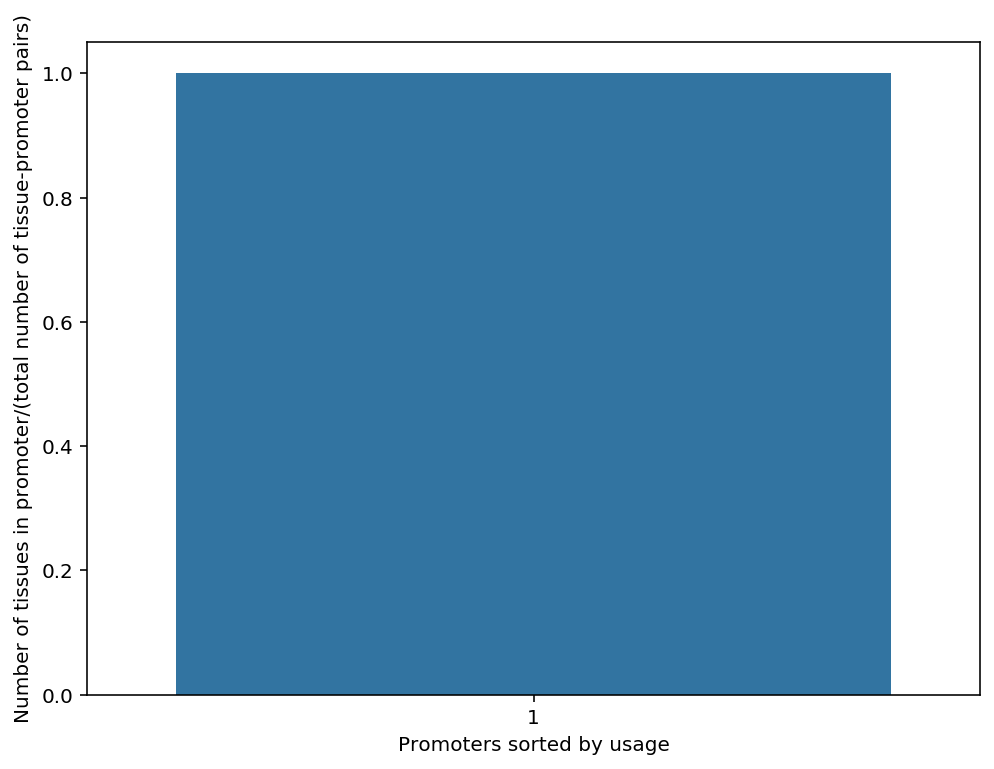

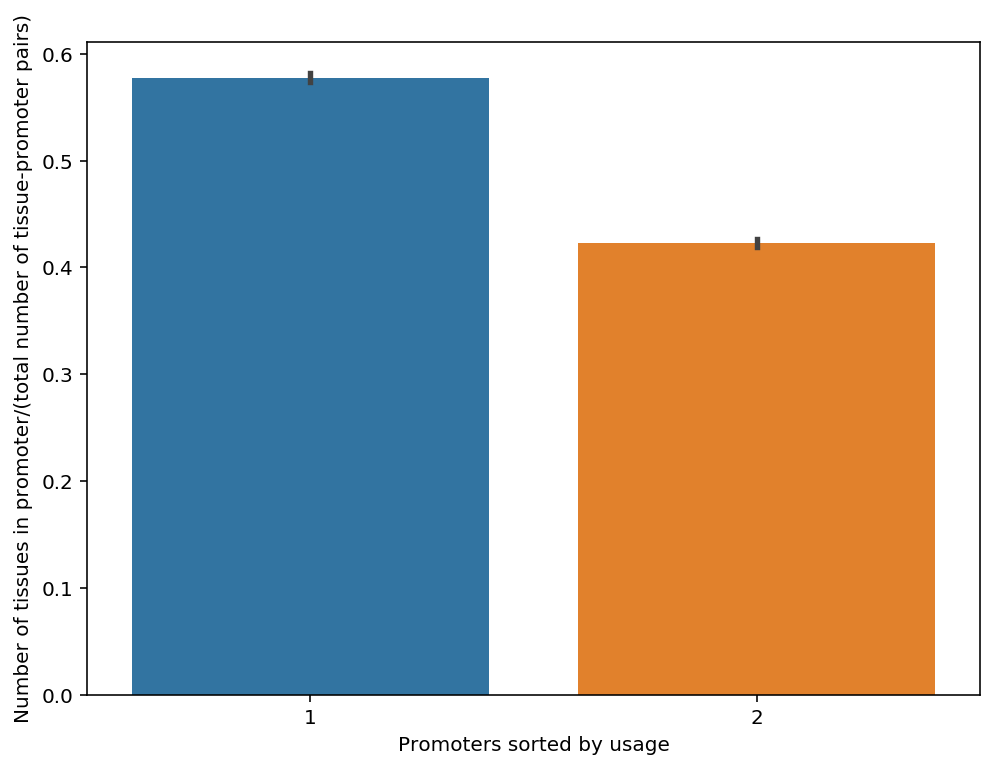

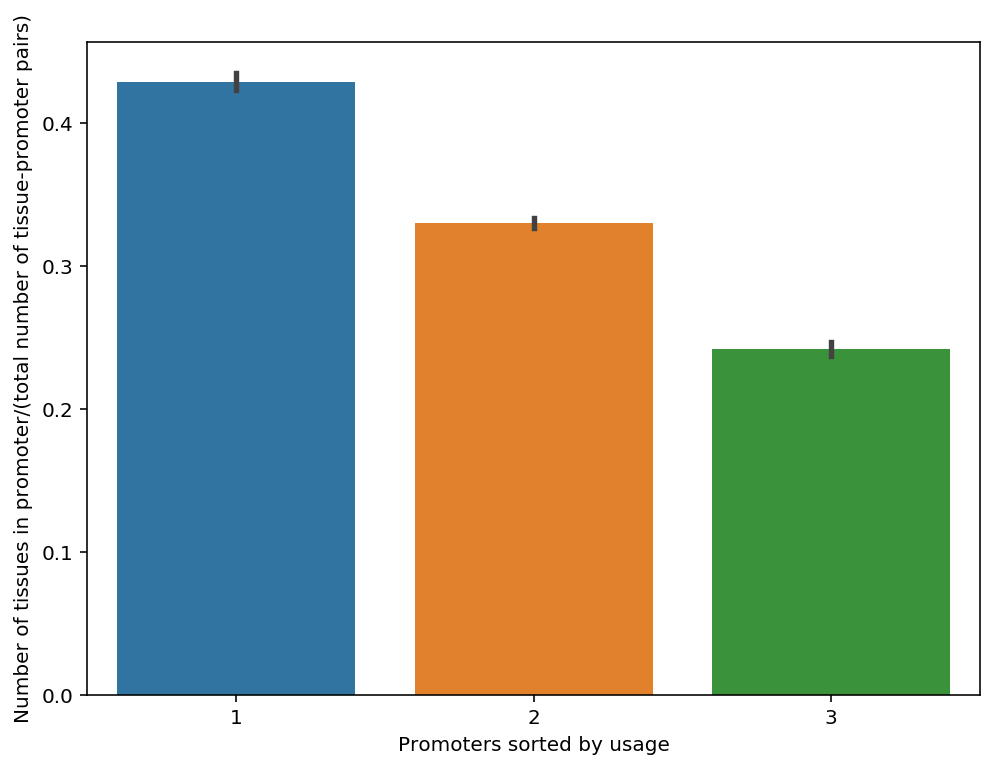

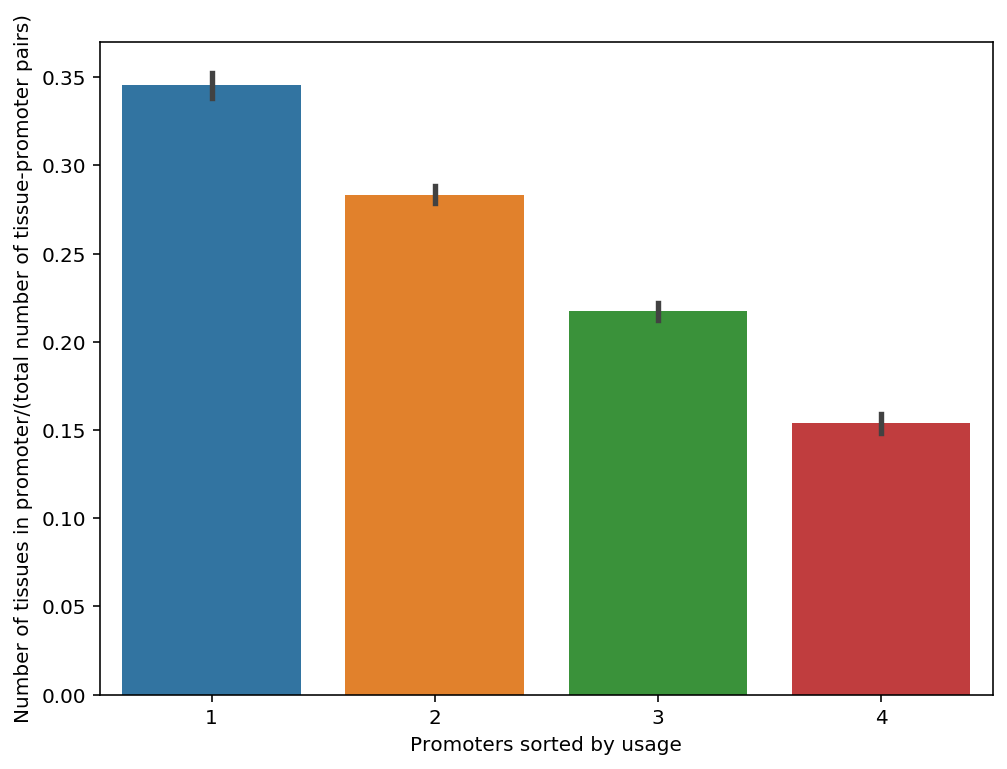

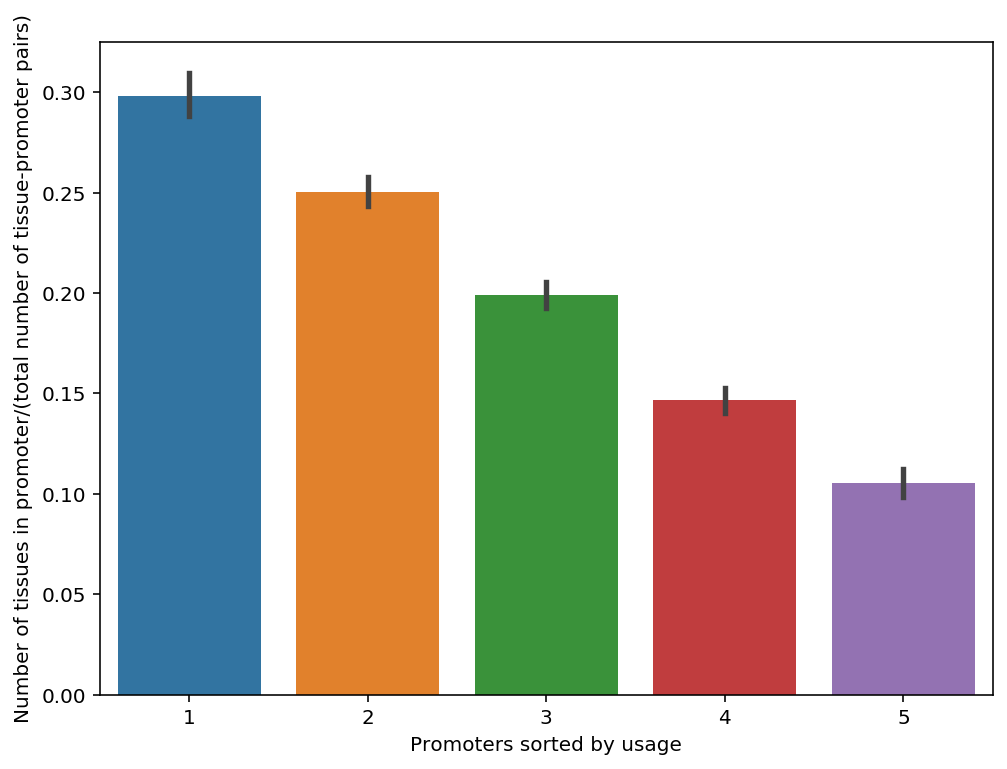

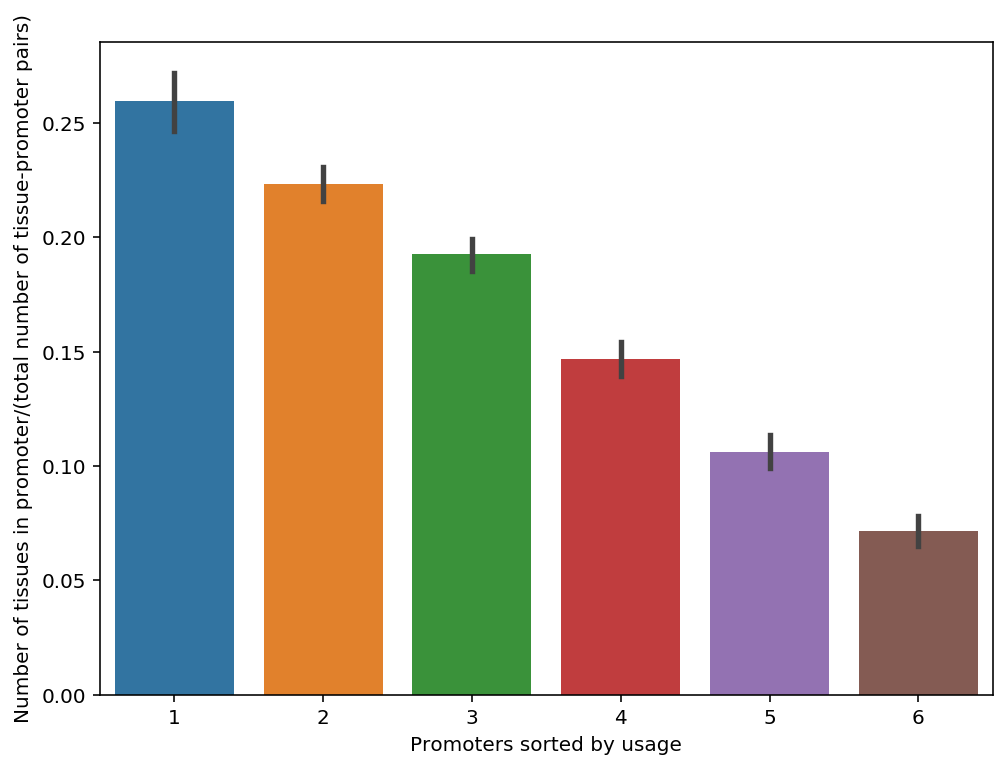

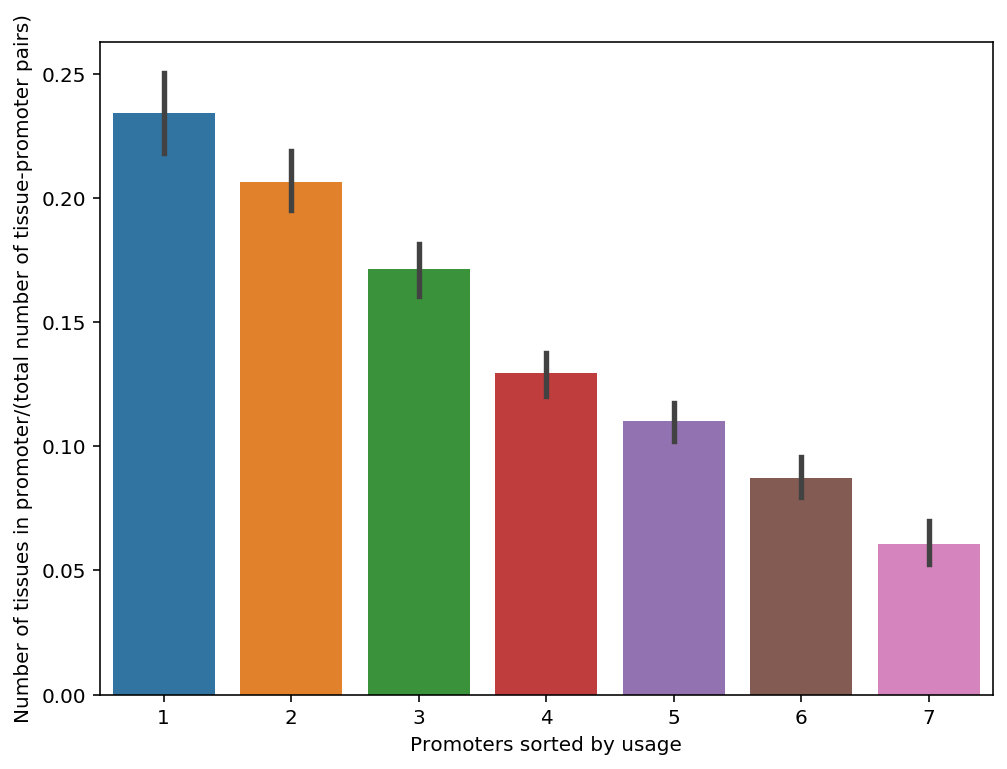

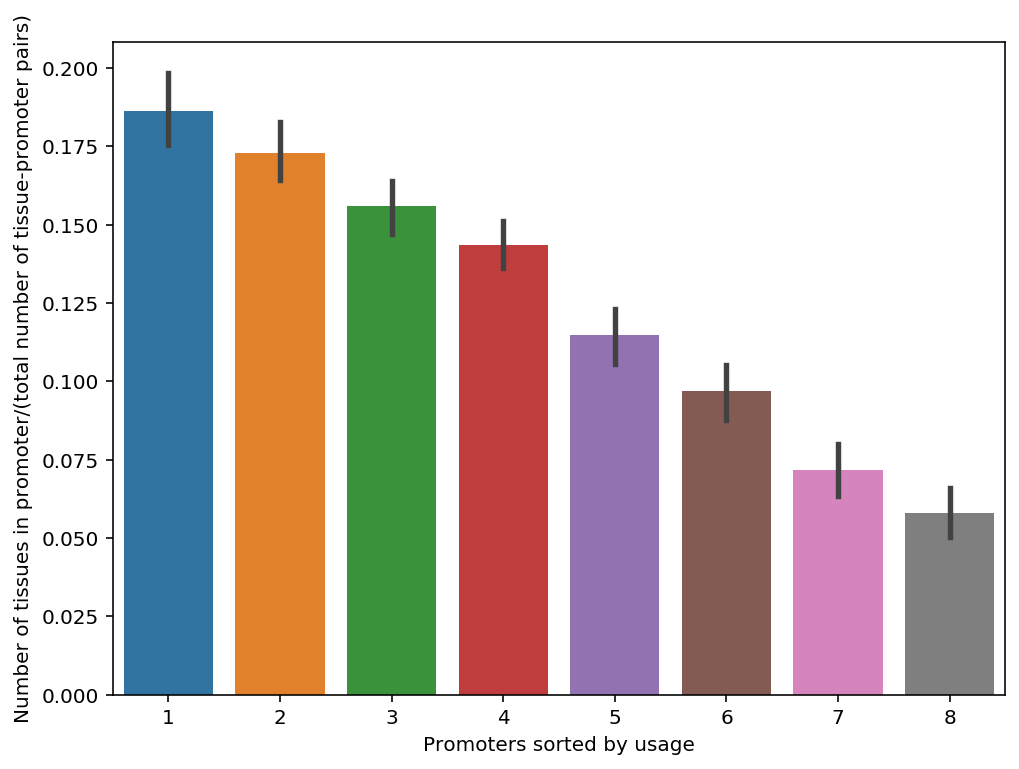

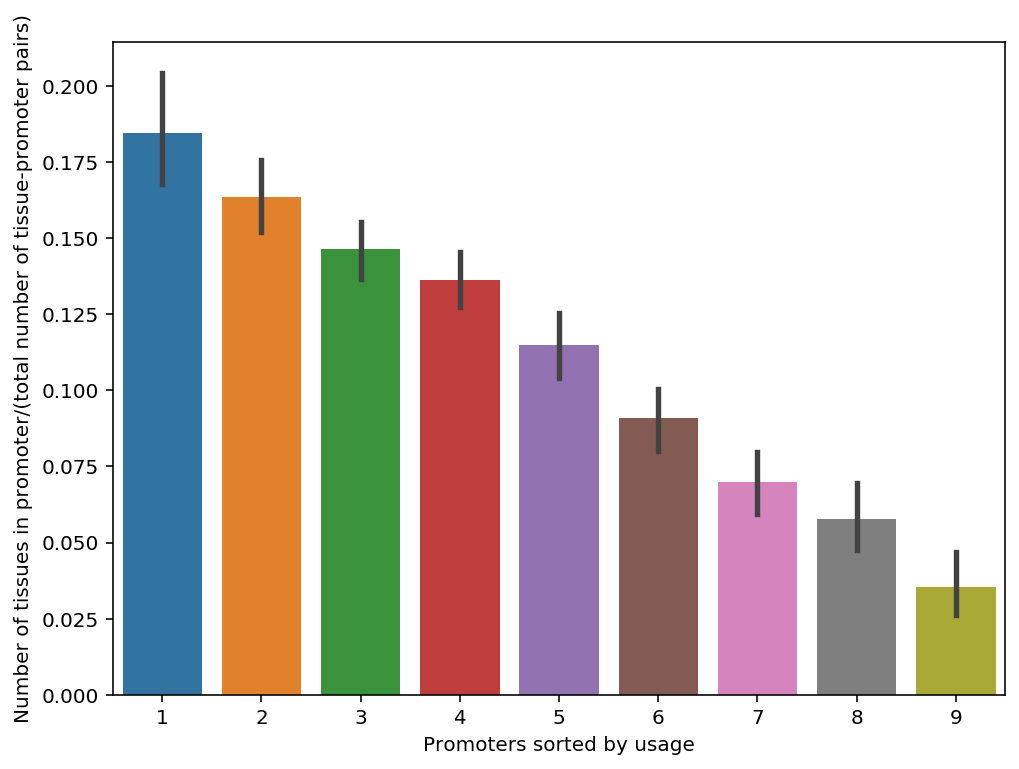

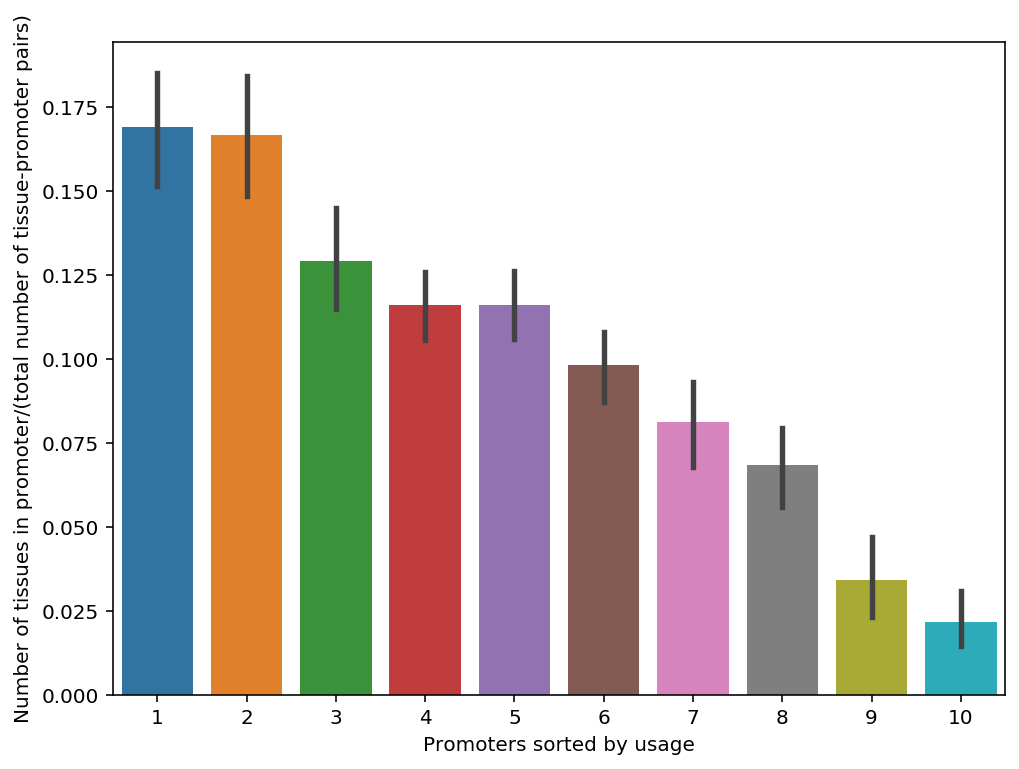

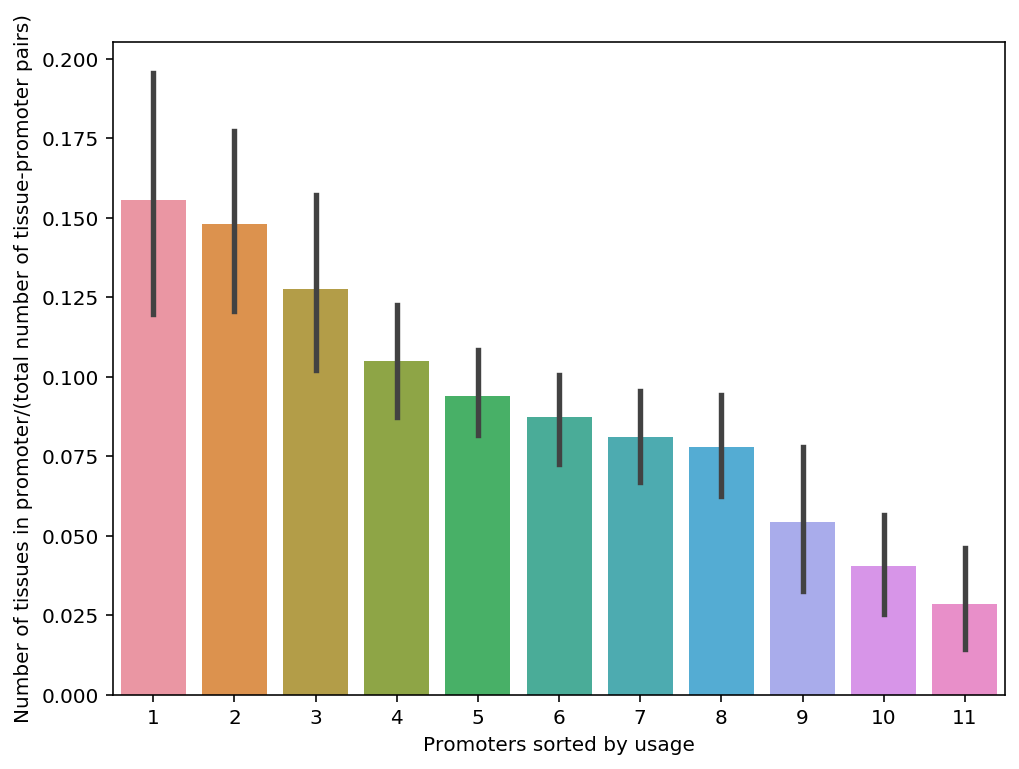

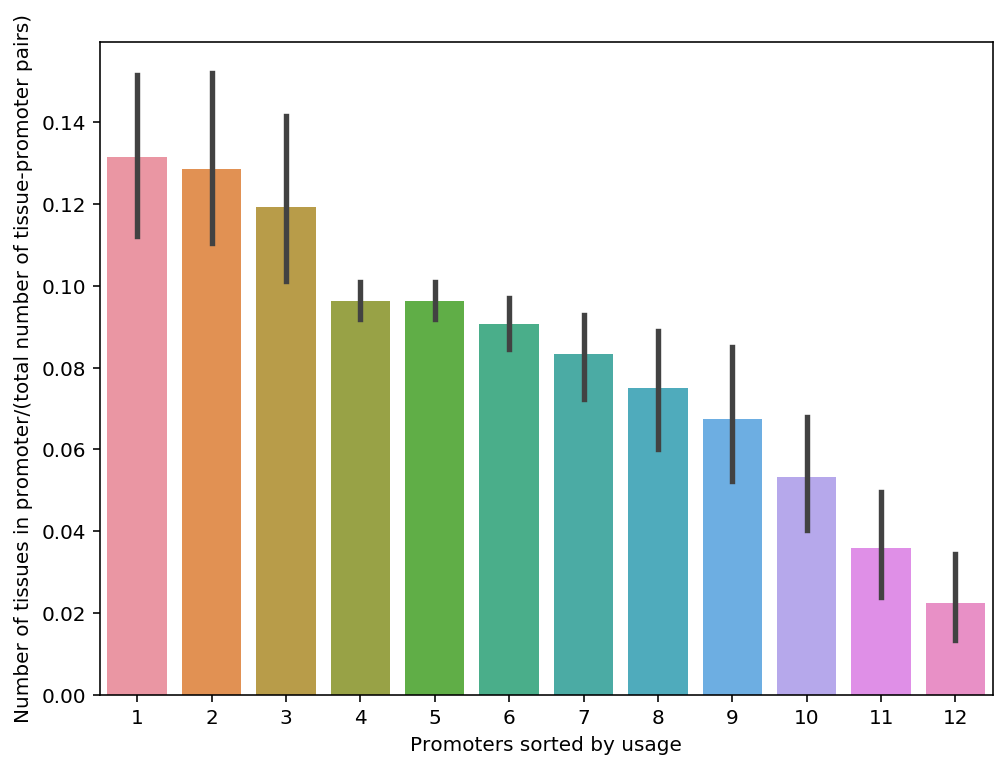

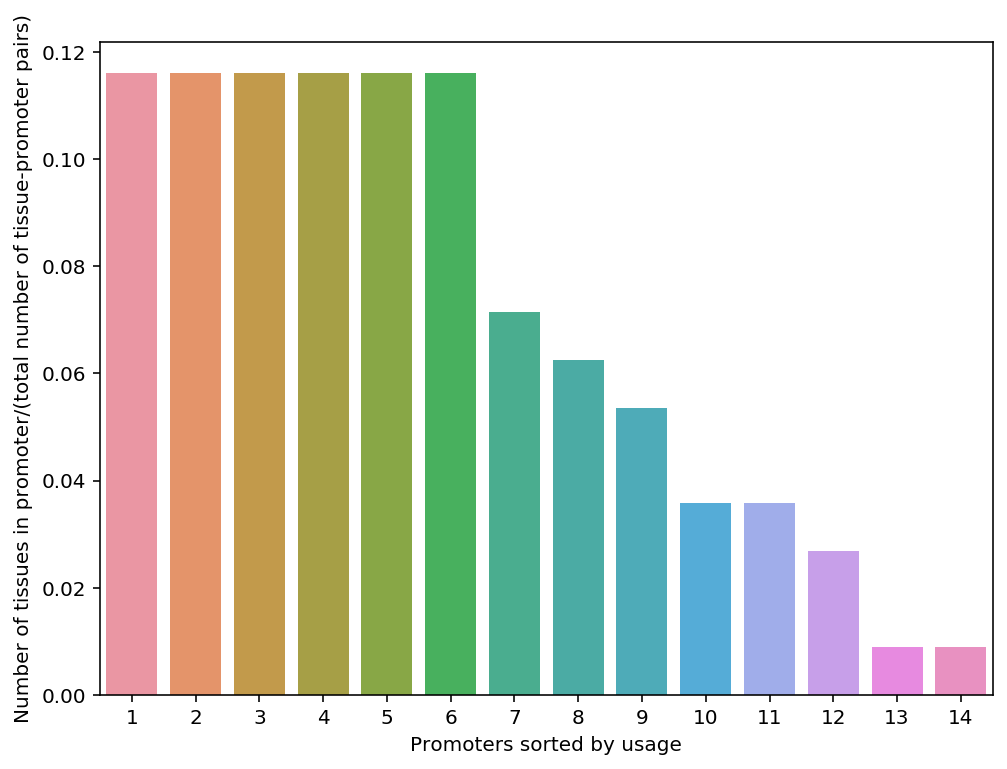

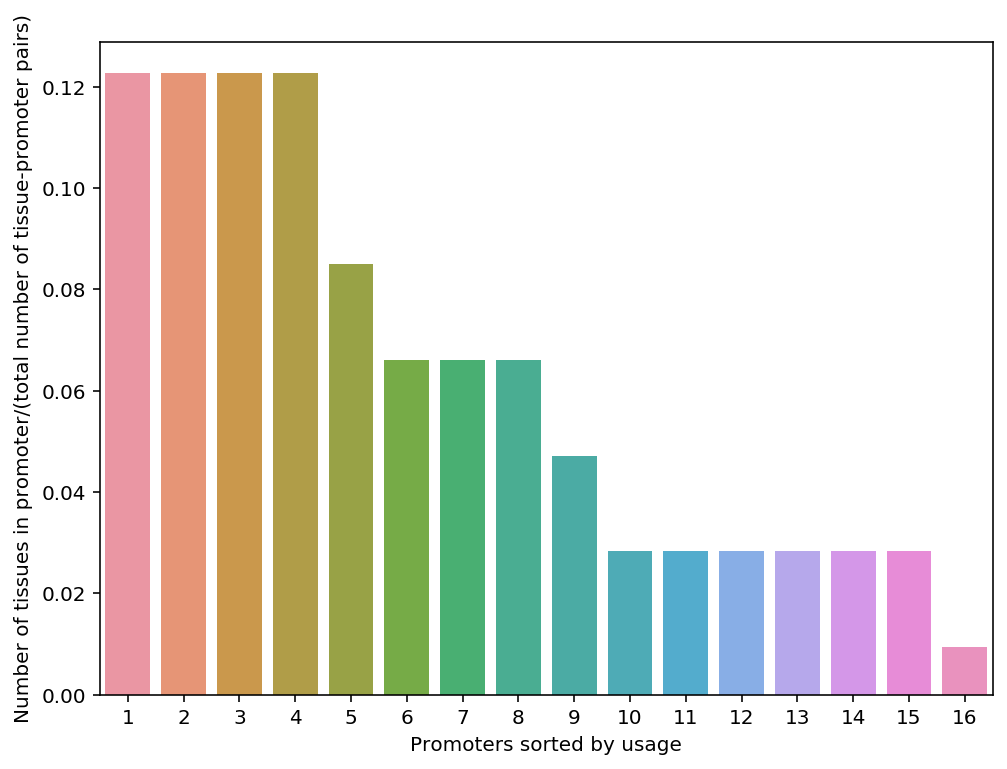

In [11]:
for ind, val in gene_alt_distribution_mat.groupby("Number of promoters", ):
    f = plt.figure()
#    print((1.0*val.astype(float))/val.astype(float)["Number of promoters"].values[0])
    sns.barplot(data=100*val.dropna(axis=1,how='any').astype(float).divide(val.drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1),
               color='blue', ci="sd)
    plt.xlabel("Promoters sorted by usage")
    plt.ylabel("Number of tissues in promoter/(total number of tissue-promoter pairs)")
    

In [64]:
from tss.visualize.fig_utils import helper_save

params {'PREFIX': 'ncbi_pice_103', 'ROOT_DIR': '/data/isshamie/TSS/', 'DATA_DIR': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'DATA_PROCESSED_DIR': '/data/isshamie/TSS/TSS/data/processed/', 'SUPPLEMENTAL_DIR': '/data/isshamie/TSS/Analysis/supplemental/', 'PIPELINE': '/data/isshamie/TSS/tss', 'GENOME_DIR': '/data/isshamie/genome', 'GENOME_FA': '/data/isshamie/genome/picr.fa', 'GENOME_GFF3': '/data/isshamie/genome/updated_final_sort.gff3', 'GENOME_GTF': '/data/isshamie/genome/updated_final_sort.gtf', 'TISSUES': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Intestine,', 'META_FILE': '/data/isshamie/TSS/TSS/parameters/raw_metaSamples.tsv'}


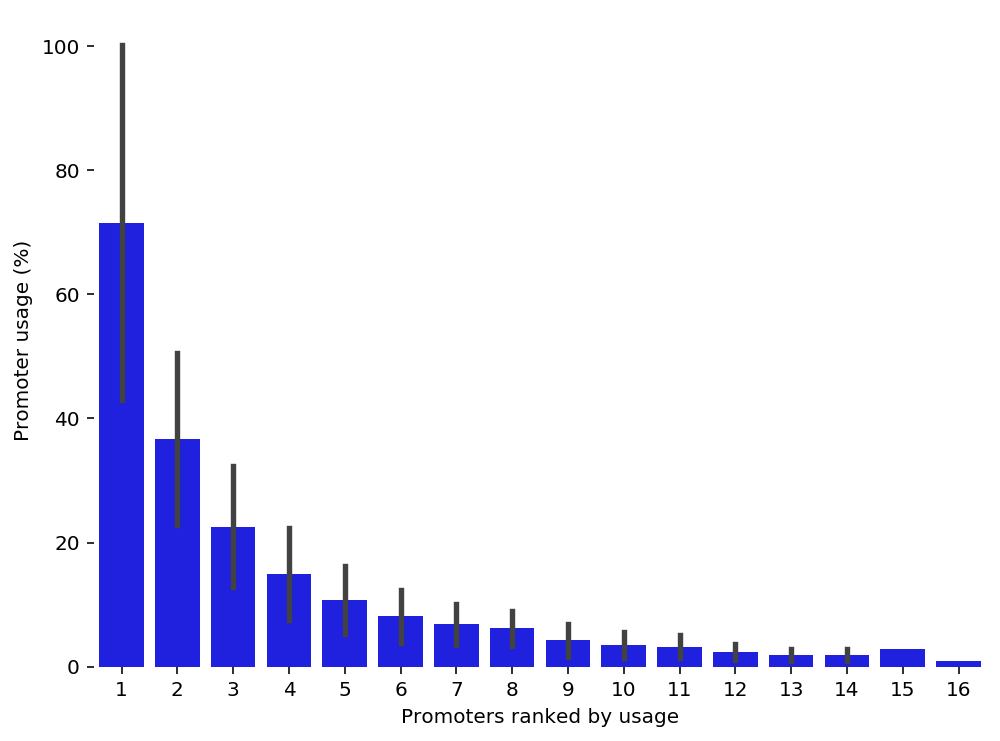

In [19]:
sns.barplot(data=100*gene_alt_distribution_mat.astype(float).divide(gene_alt_distribution_mat.drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1),
           color='blue', ci="sd")
plt.ylabel("Promoter usage (%)")
plt.xlabel("Promoters ranked by usage")
helper_save(join(save_dir,"promoter_usage_eTSS.png"))

### Only use rows when more than one promoter

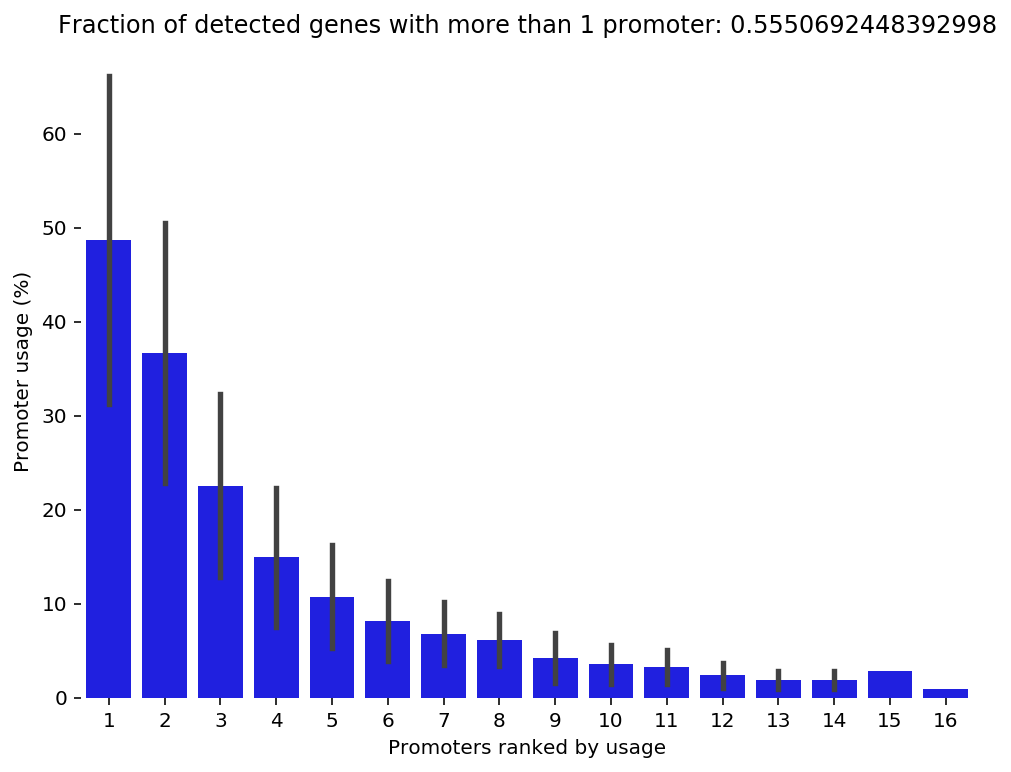

In [21]:
sns.barplot(data=100*gene_alt_distribution_mat[~(gene_alt_distribution_mat[2].isnull())].astype(float).divide(gene_alt_distribution_mat[~(gene_alt_distribution_mat[2].isnull())].drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1),
           color='blue', ci="sd")
plt.title(f"Fraction of detected genes with more than 1 promoter: {(~(gene_alt_distribution_mat[2].isnull())).sum()/gene_alt_distribution_mat.shape[0]}")
plt.ylabel("Promoter usage (%)")
plt.xlabel("Promoters ranked by usage")
helper_save(join(save_dir,"promoter_usage_moreThan1_eTSS.png"))

## Make entropy measure

In [15]:
from scipy.stats import entropy

(array([6811.,  750., 4053.,  700., 1779.,  736.,  334.,   99.,   37.,
           9.]),
 array([0.        , 0.25706211, 0.51412421, 0.77118632, 1.02824842,
        1.28531053, 1.54237264, 1.79943474, 2.05649685, 2.31355895,
        2.57062106]),
 <a list of 10 Patch objects>)

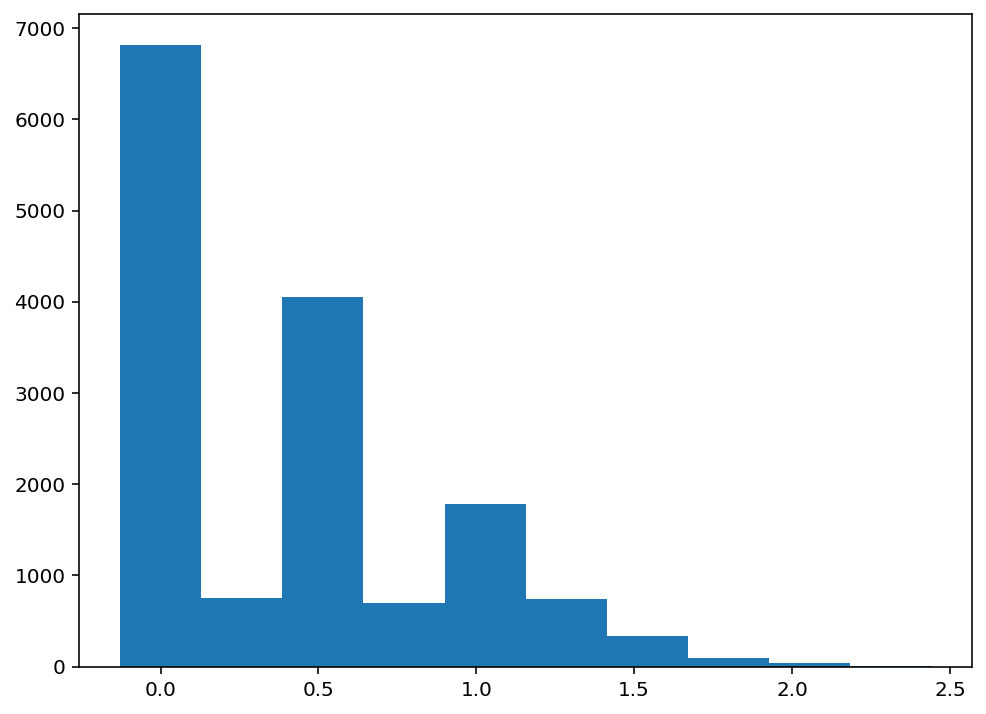

In [16]:
curr = gene_alt_distribution_mat.astype(float).divide(gene_alt_distribution_mat.drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1)

plt.hist(curr.apply(lambda x: entropy(x.dropna()), axis=1), align='left')

In [9]:
([1,2]) + ([1,5])

[1, 2, 1, 5]

## Only take eTSS with all tissues in gene. Then for each tissue, 

In [11]:
from functools import reduce

In [28]:
#df["Num Tissues"] = df["Tissues"].apply(lambda x: len(x.split(",")))

def combine_row_tissues(d):
    print(d)
    return len(set(reduce(lambda x, y: x+y, d.apply(lambda x: x.split(',')).values)))
    
gene_tis = df.groupby("Gene").agg({"Tissues": combine_row_tissues})
gene_tis

p1@A1cf_XM_027406411.1    Kidney,Liver,MiscOrgans
Name: Tissues, dtype: object
p1@A4galt_XM_027396110.1                                               BMDMwt
p1@A4galt_XM_027396111.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@A4galt_XM_027396109.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@A1cf_XM_027406411.1    Kidney,Liver,MiscOrgans
Name: Tissues, dtype: object
p1@A4galt_XM_027396110.1                                               BMDMwt
p1@A4galt_XM_027396111.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@A4galt_XM_027396109.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Aaas_XM_027396690.1                                             Lung,CHO
p1@Aaas_XM_027396689.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Aaas_XM_027396689.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Aaas_XM_027396689.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissue

Name: Tissues, dtype: object
p1@Adamts9_XM_027428903.1    MiscOrgans,FemaleReproductive,Lung,Liver,Splee...
p2@Adamts9_XM_027428903.1    MiscOrgans,FemaleReproductive,Lung,Liver,Splee...
Name: Tissues, dtype: object
p1@Adamtsl4_XM_027393644.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Adamtsl4_XM_027393644.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Adamtsl4_XM_027393645.1    FemaleReproductive,MiscOrgans,Lung,Muscle,CHO,...
p2@Adamtsl4_XM_027393645.1    FemaleReproductive,MiscOrgans,Lung,Muscle,CHO,...
Name: Tissues, dtype: object
p1@Adamtsl5_XM_027419362.1                                                  CHO
p1@Adamtsl5_XM_027419357.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Adamtsl5_XM_027419359.1                                BMDM1hKLA,Lung,Muscle
p2@Adamtsl5_XM_027419359.1                                BMDM1hKLA,Lung,Muscle
Name: Tissues, dtype: object
p1@Adap1_XM_027413469.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Adap1_

Name: Tissues, dtype: object
p1@Alms1_XM_027428762.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Alox12_XM_027426936.1    MiscOrgans,FemaleReproductive,Kidney,Lung,Musc...
Name: Tissues, dtype: object
p1@Alox15_XM_027426935.1    FemaleReproductive,MiscOrgans,Lung,Muscle,Hear...
p2@Alox15_XM_027426935.1    FemaleReproductive,MiscOrgans,Lung,Muscle,Hear...
Name: Tissues, dtype: object
p1@Alox5_XM_027429216.1    FemaleReproductive,MiscOrgans,Lung,Muscle,Hear...
Name: Tissues, dtype: object
p1@Alox5ap_XM_027413725.1                                BMDM1hKLA,Lung,BMDMwt
p1@Alox5ap_XM_027413726.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Aloxe3_XM_027427047.1            BMDM1hKLA,BMDMwt
p2@Aloxe3_XM_027427047.1            BMDM1hKLA,BMDMwt
p1@Aloxe3_XM_027427051.1    BMDM1hKLA,Lung,Brain,CHO
p2@Aloxe3_XM_027427051.1    BMDM1hKLA,Lung,Brain,CHO
Name: Tissues, dtype: object
p1@Alpk1_XM_027395677.1    MiscOrgans,F

Name: Tissues, dtype: object
p1@Apoo_XM_027431880.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Apool_XM_027432979.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Apopt1_XM_027416747.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Apopt1_XM_027416748.1                                      BMDM1hKLA,Brain
p2@Apopt1_XM_027416748.1                                      BMDM1hKLA,Brain
Name: Tissues, dtype: object
p1@App_XM_027412364.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@App_XM_027412364.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@App_XM_027412364.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Appbp2_XM_027426391.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Appbp2_XM_027426391.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Appl1_XM_027389622.1    MiscOrgans,FemaleReproductive,L

Name: Tissues, dtype: object
p1@Asgr2_XM_027426951.1    MiscOrgans,Kidney,Lung,Muscle,Liver
Name: Tissues, dtype: object
p1@Ash1l_XM_027393183.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p1@Ash1l_XM_027393182.1                        Muscle,CHO,Heart,Spleen,Brain
Name: Tissues, dtype: object
p1@Ash2l_XM_027395363.1    BMDM1hKLA,BMDMwt
p2@Ash2l_XM_027395363.1    BMDM1hKLA,BMDMwt
p1@Ash2l_XM_027395362.1     Lung,BMDMwt,CHO
Name: Tissues, dtype: object
p1@Asic1_XM_027396554.1    Brain,BMDMwt
p2@Asic1_XM_027396554.1    Brain,BMDMwt
p3@Asic1_XM_027396554.1    Brain,BMDMwt
p1@Asic1_XM_027396555.1           Brain
Name: Tissues, dtype: object
p1@Asic2_XM_027426503.1    FemaleReproductive,Kidney,CHO,Spleen,Pancreas,...
Name: Tissues, dtype: object
p1@Asic3_XM_027428442.1    BMDM1hKLA,Kidney,Muscle
p2@Asic3_XM_027428442.1    BMDM1hKLA,Kidney,Muscle
Name: Tissues, dtype: object
p1@Asip_XM_027421413.1    CHO
p1@Asip_XM_027421414.1    CHO
Name: Tissues, dtype: object
p1@Asl_XM_027413802.

Name: Tissues, dtype: object
p1@Barhl1_XM_027423082.1    Brain
Name: Tissues, dtype: object
p1@Barhl2_XM_027425869.1    Brain
Name: Tissues, dtype: object
p1@Batf_XM_027418552.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Batf2_XM_027408514.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Batf2_XM_027408515.1                                            BMDM1hKLA
Name: Tissues, dtype: object
p1@Batf3_XM_027418687.1    Muscle,Lung,FemaleReproductive,Spleen
p2@Batf3_XM_027418687.1    Muscle,Lung,FemaleReproductive,Spleen
Name: Tissues, dtype: object
p1@Bax_NM_001244020.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Bax_NM_001244020.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Baz1a_XM_027419709.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Baz1b_XM_027416175.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Baz1b_XM_027416175.1    MiscOrgan

Name: Tissues, dtype: object
p1@C1H4orf47_XM_027391110.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@C1H4orf47_XM_027391110.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@C1H6orf106_XM_027389015.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@C1H6orf136_XM_027388636.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@C1H6orf136_XM_027388636.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@C1H6orf141_XM_027387484.1    MiscOrgans,FemaleReproductive,Kidney,Muscle,Li...
p2@C1H6orf141_XM_027387484.1    MiscOrgans,FemaleReproductive,Kidney,Muscle,Li...
Name: Tissues, dtype: object
p1@C1H6orf89_XM_027394442.1                   BMDM1hKLA,Brain,FemaleReproductive
p2@C1H6orf89_XM_027394442.1                   BMDM1hKLA,Brain,FemaleReproductive
p1@C1H6orf89_XM_027394441.1                              BMDMwt,MiscOrgans,Heart
p1@C1H6orf89_XM_027394440.1    MiscOrgan

Name: Tissues, dtype: object
p1@Ca3_XM_027398736.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Ca3_XM_027398736.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Ca4_XM_027426393.1    Lung,Kidney,Muscle,Heart,Brain
p2@Ca4_XM_027426393.1    Lung,Kidney,Muscle,Heart,Brain
Name: Tissues, dtype: object
p1@Ca5a_XM_027410694.1    Liver
p2@Ca5a_XM_027410694.1    Liver
Name: Tissues, dtype: object
p1@Ca5b_XM_027432622.1                        FemaleReproductive,Kidney,CHO
p2@Ca5b_XM_027432622.1                        FemaleReproductive,Kidney,CHO
p3@Ca5b_XM_027432622.1                        FemaleReproductive,Kidney,CHO
p1@Ca5b_XM_027432621.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ca7_XM_027405749.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@Ca7_XM_027405749.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p1@Ca7_XM_027405748.1                                     Brain,MiscOrgans


Name: Tissues, dtype: object
p1@Ccdc189_XM_027404554.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ccdc189_XM_027404554.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ccdc190_XM_027417079.1    Lung,Brain,MiscOrgans
p2@Ccdc190_XM_027417079.1    Lung,Brain,MiscOrgans
Name: Tissues, dtype: object
p1@Ccdc191_XM_027412649.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ccdc191_XM_027412649.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ccdc198_XM_027386577.1    Kidney,BMDMwt,Muscle,BMDM1hKLA,Pancreas,Brain
Name: Tissues, dtype: object
p1@Ccdc24_XM_027399019.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ccdc25_XM_027390305.1                                                Heart
p1@Ccdc25_XM_027390304.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ccdc28a_XM_027401949.1    MiscOrgans,FemaleReproductive,Lung,Kidney

Name: Tissues, dtype: object
p1@Cdh17_XM_027403525.1    Muscle,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Cdh2_XM_027404378.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Cdh2_XM_027404378.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p3@Cdh2_XM_027404378.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Cdh22_XM_027423418.1    Brain
Name: Tissues, dtype: object
p1@Cdh24_XM_027390631.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Cdh3_XM_027405924.1    FemaleReproductive,Lung,Kidney,Spleen,Brain
p2@Cdh3_XM_027405924.1    FemaleReproductive,Lung,Kidney,Spleen,Brain
Name: Tissues, dtype: object
p1@Cdh4_XM_027419817.1    Muscle
Name: Tissues, dtype: object
p1@Cdh5_XM_027405733.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Cdh6_XM_027401239.1    Pancreas,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Cdh7_XM_027417876.1    Brain
N

Name: Tissues, dtype: object
p1@Chd6_XM_027423517.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Chd7_XM_027398890.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Chd8_XM_027386661.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Chd8_XM_027386661.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Chd9_XM_027405569.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Chd9_XM_027405567.1                                                Brain
p1@Chd9_XM_027405563.1    MiscOrgans,FemaleReproductive,Lung,BMDMwt,Musc...
p1@Chd9_XM_027405568.1    MiscOrgans,Lung,Kidney,Muscle,Liver,CHO,Spleen...
p2@Chd9_XM_027405568.1    MiscOrgans,Lung,Kidney,Muscle,Liver,CHO,Spleen...
p1@Chd9_XM_027405564.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Chd9_XM_027405570.1                                               BMDMwt
p1@Chd9_XM_027405572.1    FemaleReproductive,Mis

Name: Tissues, dtype: object
p1@Cnnm4_XM_027386865.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Cnnm4_XM_027386865.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Cnot1_XM_027405717.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Cnot1_XM_027405717.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Cnot10_XM_027415303.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Cnot11_XM_027386789.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Cnot3_XM_027430997.1                                Lung,Brain,CHO,BMDMwt
p1@Cnot3_XM_027430999.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Cnot4_XM_027391448.1                                                Brain
p1@Cnot4_XM_027391454.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Cnot4_XM_027391450.1                               

Name: Tissues, dtype: object
p1@Crygs_XM_027412994.1    MiscOrgans,FemaleReproductive,Kidney,Lung,Musc...
p2@Crygs_XM_027412994.1    MiscOrgans,FemaleReproductive,Kidney,Lung,Musc...
Name: Tissues, dtype: object
p1@Cryl1_XM_027390478.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Cryl1_XM_027390478.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Cryl1_XM_027390477.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Cryl1_XM_027390477.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Crym_XM_027410216.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Cryz_XM_027395185.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Cryz_XM_027395185.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Cryz_XM_027395186.1                                               Kidney
Name: Tissues, dtype: object
p1@Cryzl1_XM_027415609.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Cryzl1_X

Name: Tissues, dtype: object
p1@Ddit4_XM_027388318.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ddit4_XM_027388318.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ddit4l_XM_027395789.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Ddn_XM_027396481.1    Brain
p2@Ddn_XM_027396481.1    Brain
p3@Ddn_XM_027396481.1    Brain
Name: Tissues, dtype: object
p1@Ddost_XM_027399799.1                                               Kidney
p1@Ddost_XM_027399798.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ddr1_XM_027388559.1                                               Muscle
p1@Ddr1_XM_027388558.1                                    Muscle,MiscOrgans
p1@Ddr1_XM_027388554.1    FemaleReproductive,Lung,CHO,Heart,BMDM1hKLA,Brain
p1@Ddr1_XM_027388555.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ddr1_XM_027388555.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM

Name: Tissues, dtype: object
p1@Dnajc2_XM_027393425.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Dnajc21_XM_027401284.1    Kidney,BMDMwt,Muscle,CHO,Heart,Spleen
p2@Dnajc21_XM_027401284.1    Kidney,BMDMwt,Muscle,CHO,Heart,Spleen
Name: Tissues, dtype: object
p1@Dnajc24_XM_027422312.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Dnajc25_XM_027403011.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Dnajc27_XM_027424553.1    FemaleReproductive,MiscOrgans,Lung,Muscle,CHO,...
Name: Tissues, dtype: object
p1@Dnajc28_XM_027415591.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p1@Dnajc28_XM_027415593.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Dnajc3_XM_027393923.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Dnajc3_XM_027393923.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Dnajc3_XM_027393923.1    MiscOr

Name: Tissues, dtype: object
p1@Echdc2_XM_027402414.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p1@Echdc2_XM_027402415.1    MiscOrgans,FemaleReproductive,Kidney,BMDMwt,Mu...
Name: Tissues, dtype: object
p1@Echdc3_XM_027405162.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Echs1_XM_027409053.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Eci2_XM_027409263.1    MiscOrgans,Lung,Kidney,Muscle,Liver,CHO,Heart,...
p2@Eci2_XM_027409263.1    MiscOrgans,Lung,Kidney,Muscle,Liver,CHO,Heart,...
p3@Eci2_XM_027409263.1    MiscOrgans,Lung,Kidney,Muscle,Liver,CHO,Heart,...
p1@Eci2_XM_027409261.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Eci2_XM_027409261.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Eci2_XM_027409262.1                                                Heart
Name: Tissues, dtype: object
p1@Ecm1_XM_027393659.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
Name: Tissue

Name: Tissues, dtype: object
p1@Enkd1_XM_027405845.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Enkur_XM_027405339.1    Lung,FemaleReproductive
Name: Tissues, dtype: object
p1@Eno2_XM_027428238.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p2@Eno2_XM_027428238.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Eno3_XM_027426902.1         MiscOrgans,Muscle,Liver,Heart,Pancreas
p1@Eno3_XM_027426901.1    MiscOrgans,Lung,Muscle,Liver,Heart,Pancreas
p1@Eno3_XM_027426900.1     Kidney,BMDMwt,Liver,CHO,BMDM1hKLA,Pancreas
p2@Eno3_XM_027426900.1     Kidney,BMDMwt,Liver,CHO,BMDM1hKLA,Pancreas
p3@Eno3_XM_027426900.1     Kidney,BMDMwt,Liver,CHO,BMDM1hKLA,Pancreas
Name: Tissues, dtype: object
p1@Eno4_XM_027406878.1    Lung,Brain,FemaleReproductive
p2@Eno4_XM_027406878.1    Lung,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Enoph1_XM_027387652.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: 

Name: Tissues, dtype: object
p1@Faap20_XM_027398514.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Faap20_XM_027398514.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Faap24_XM_027430285.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Faap24_XM_027430285.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Fabp1_XM_027429539.1    Liver,Brain,MiscOrgans,Heart
Name: Tissues, dtype: object
p1@Fabp2_XM_027395412.1    MiscOrgans,FemaleReproductive,Kidney,Muscle,Li...
Name: Tissues, dtype: object
p1@Fabp3_XM_027399435.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Fabp3_XM_027399435.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Fabp4_XM_027398764.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Fabp5_XM_027398767.1    MiscOrgans,FemaleReproductive,Lung,BMDMwt,Musc...
p2@Fabp5_XM_027398767.1    MiscOrgans,Female

Name: Tissues, dtype: object
p1@Fbxo40_XM_027412717.1    FemaleReproductive,MiscOrgans,Muscle,Heart,Brain
Name: Tissues, dtype: object
p1@Fbxo42_XM_027399907.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Fbxo42_XM_027399907.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Fbxo46_XM_027430940.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Fbxo46_XM_027430941.1                                                  CHO
Name: Tissues, dtype: object
p1@Fbxo47_XM_027424067.1                          BMDM1hKLA,Lung,Kidney,Brain
p2@Fbxo47_XM_027424067.1                          BMDM1hKLA,Lung,Kidney,Brain
p1@Fbxo47_XM_027424066.1    MiscOrgans,Lung,BMDMwt,Muscle,Liver,CHO,BMDM1h...
Name: Tissues, dtype: object
p1@Fbxo5_XM_027401026.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Fbxo5_XM_027401026.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Fbxo7_XM_027392485.1    Liver
Name: Tissues, d

Name: Tissues, dtype: object
p1@Fst_XM_027401433.1        MiscOrgans,Lung,Kidney,Muscle,CHO,Heart,Brain
p1@Fst_XM_027401434.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Fst_XM_027401434.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Fstl1_XM_027412705.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Fstl1_XM_027412705.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Fstl3_XM_027419452.1    FemaleReproductive,BMDMwt,Liver,CHO,Heart,Spleen
p2@Fstl3_XM_027419452.1    FemaleReproductive,BMDMwt,Liver,CHO,Heart,Spleen
Name: Tissues, dtype: object
p1@Ftcd_XM_027394269.1    Liver
Name: Tissues, dtype: object
p1@Fth1_XM_027406745.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Fth1_XM_027406745.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ftl_XM_027420633.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ftl_XM_027420633.1    MiscOrgans,

Name: Tissues, dtype: object
p1@Gimd1_XM_027395729.1    Kidney,Liver,MiscOrgans
Name: Tissues, dtype: object
p1@Gin1_XM_027397707.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Gin1_XM_027397707.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ginm1_XM_027402052.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Gins1_XM_027421555.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
p2@Gins1_XM_027421555.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
Name: Tissues, dtype: object
p1@Gins2_XM_027410729.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Gins2_XM_027410729.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Gins3_XM_027405710.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Gins3_XM_027405710.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Gins4_XM_027395300.1    MiscOrgans,FemaleReproductiv

Name: Tissues, dtype: object
p1@Gpr63_XM_027403443.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@Gpr63_XM_027403443.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p3@Gpr63_XM_027403443.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Gpr65_XM_027419564.1    MiscOrgans,Kidney,Lung,BMDMwt,BMDM1hKLA,Spleen...
Name: Tissues, dtype: object
p1@Gpr68_XM_027419127.1    Brain
Name: Tissues, dtype: object
p1@Gpr75_XM_027387709.1    MiscOrgans,FemaleReproductive,Kidney,Muscle,Li...
Name: Tissues, dtype: object
p1@Gpr83_XM_027410833.1    Brain
Name: Tissues, dtype: object
p1@Gpr84_XM_027396778.1    BMDM1hKLA
Name: Tissues, dtype: object
p1@Gpr85_XM_027389929.1    MiscOrgans,FemaleReproductive,Kidney,BMDMwt,Mu...
p2@Gpr85_XM_027389929.1    MiscOrgans,FemaleReproductive,Kidney,BMDMwt,Mu...
Name: Tissues, dtype: object
p1@Gpr87_XM_027391664.1    Spleen,Liver
Name: Tissues, dtype: object
p1@Gprasp1_XM_027432959.1    Brain,CHO
Name: Tissues, dty

Name: Tissues, dtype: object
p1@Hdgfl2_XM_027416890.1    FemaleReproductive,MiscOrgans,Lung,CHO,Spleen,...
p1@Hdgfl2_XM_027416892.1                                                Brain
Name: Tissues, dtype: object
p1@Hdgfl3_XM_027407542.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Hdgfl3_XM_027407542.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Hdhd2_XM_027397930.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Hdhd3_XM_027400317.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Hdhd3_XM_027400317.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Hdhd5_XM_027429312.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Hdhd5_XM_027429312.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Hdlbp_XM_027397664.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Hdlbp_XM_027397665.1    MiscOrgans,FemaleReproduc

Name: Tissues, dtype: object
p1@Hsh2d_XM_027394905.1    Pancreas
Name: Tissues, dtype: object
p1@Hsp90aa1_NM_001246821.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Hsp90aa1_NM_001246821.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Hsp90aa1_NM_001246821.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p4@Hsp90aa1_NM_001246821.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Hsp90b1_XM_027392542.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Hspa12a_XM_027406871.1    FemaleReproductive,MiscOrgans,Kidney,Lung,Musc...
p2@Hspa12a_XM_027406871.1    FemaleReproductive,MiscOrgans,Kidney,Lung,Musc...
p1@Hspa12a_XM_027406872.1                              Muscle,Spleen,Brain,CHO
p2@Hspa12a_XM_027406872.1                              Muscle,Spleen,Brain,CHO
Name: Tissues, dtype: object
p1@Hspa12b_XM_027421759.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: obj

Name: Tissues, dtype: object
p1@Inhbe_XM_027392211.1    Muscle
Name: Tissues, dtype: object
p1@Inka1_XM_027414519.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Inka1_XM_027414519.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p3@Inka1_XM_027414519.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p4@Inka1_XM_027414519.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Inka2_XM_027393883.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Inka2_XM_027393883.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Inmt_XM_027429690.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Inmt_XM_027429690.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Inmt_XM_027429690.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p4@Inmt_XM_027429690.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ino80_XM_027422165.1    MiscOrgans,FemaleReproductiv

Name: Tissues, dtype: object
p1@Katnb1_XM_027405693.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
p2@Katnb1_XM_027405693.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
p3@Katnb1_XM_027405693.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
p1@Katnb1_XM_027405691.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Katnbl1_XM_027422276.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Kazald1_XM_027407192.1                              Muscle,Spleen,CHO,Heart
p2@Kazald1_XM_027407192.1                              Muscle,Spleen,CHO,Heart
p1@Kazald1_XM_027407193.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Kazald1_XM_027407193.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p3@Kazald1_XM_027407193.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p4@Kazald1_XM_027407193.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Kazn_XM_02739996

Name: Tissues, dtype: object
p1@Klhl11_XM_027428156.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Klhl11_XM_027428156.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Klhl12_XM_027417550.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Klhl12_XM_027417550.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Klhl13_XM_027431965.1    Pancreas,Brain,FemaleReproductive,Heart
p2@Klhl13_XM_027431965.1    Pancreas,Brain,FemaleReproductive,Heart
p1@Klhl13_XM_027431961.1                                Brain,Heart
p1@Klhl13_XM_027431960.1                             Pancreas,Brain
p1@Klhl13_XM_027431964.1                       Muscle,Kidney,BMDMwt
p2@Klhl13_XM_027431964.1                       Muscle,Kidney,BMDMwt
p1@Klhl13_XM_027431962.1                                  BMDM1hKLA
Name: Tissues, dtype: object
p1@Klhl14_XM_027400551.1    Kidney,Liver,MiscOrgans,Spleen
Name: Tissues, dtype: object
p1@Klhl1

Name: Tissues, dtype: object
p1@LOC100752137_XM_027411091.1    Kidney
p2@LOC100752137_XM_027411091.1    Kidney
Name: Tissues, dtype: object
p1@LOC100752183_XM_027404990.1    Pancreas
Name: Tissues, dtype: object
p1@LOC100752187_XM_027400183.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100752198_XM_027390689.1    Muscle,Lung,MiscOrgans,Heart
p2@LOC100752198_XM_027390689.1    Muscle,Lung,MiscOrgans,Heart
Name: Tissues, dtype: object
p1@LOC100752202_XM_027395536.1              BMDM1hKLA
p1@LOC100752202_XM_027395535.1    Kidney,Brain,BMDMwt
Name: Tissues, dtype: object
p1@LOC100752211_XM_027417554.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100752211_XM_027417554.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100752244_XM_027396105.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100752257_XM_027418233.1    MiscOrgans,FemaleReproductive,Lung,Kidn

Name: Tissues, dtype: object
p1@LOC100756214_XM_027423704.1                 Kidney,Lung,Liver,FemaleReproductive
p1@LOC100756214_XM_027423706.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100756278_XM_027433960.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100756292_XM_027397365.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100756292_XM_027397365.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100756330_XM_027412557.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC100756343_XM_027400190.1    FemaleReproductive,Lung,Kidney,CHO
p2@LOC100756343_XM_027400190.1    FemaleReproductive,Lung,Kidney,CHO
Name: Tissues, dtype: object
p1@LOC100756347_XM_027412998.1    FemaleReproductive,Brain,MiscOrgans
p2@LOC100756347_XM_027412998.1    FemaleReproductive,Brain,MiscOrgans
Name: Tissues, dtype: object
p1@LOC100756381

Name: Tissues, dtype: object
p1@LOC100759951_XM_027425746.1    MiscOrgans,BMDMwt,Muscle,Heart,Spleen
p2@LOC100759951_XM_027425746.1    MiscOrgans,BMDMwt,Muscle,Heart,Spleen
Name: Tissues, dtype: object
p1@LOC100759959_XM_027401746.1    FemaleReproductive,Lung,Muscle,Heart,Brain
p2@LOC100759959_XM_027401746.1    FemaleReproductive,Lung,Muscle,Heart,Brain
Name: Tissues, dtype: object
p1@LOC100759972_XM_027388472.1    MiscOrgans,Lung,Liver,CHO,Spleen,Pancreas
Name: Tissues, dtype: object
p1@LOC100759975_XM_027427619.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100759975_XM_027427619.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100759976_XM_027431592.1    MiscOrgans,Kidney,Muscle,Liver,Pancreas,Brain
Name: Tissues, dtype: object
p1@LOC100759987_XM_027418973.1    Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@LOC100759999_XM_027393021.1    Lung,Liver,MiscOrgans,Spleen
p1@LOC100759999_XM_027393020.1                       

Name: Tissues, dtype: object
p1@LOC100763899_XM_027427682.1    Muscle,Spleen,BMDMwt,MiscOrgans
Name: Tissues, dtype: object
p1@LOC100763909_XM_027430834.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC100763924_XM_027389835.1    FemaleReproductive,BMDMwt,Heart,BMDM1hKLA,Brain
p2@LOC100763924_XM_027389835.1    FemaleReproductive,BMDMwt,Heart,BMDM1hKLA,Brain
p3@LOC100763924_XM_027389835.1    FemaleReproductive,BMDMwt,Heart,BMDM1hKLA,Brain
p4@LOC100763924_XM_027389835.1    FemaleReproductive,BMDMwt,Heart,BMDM1hKLA,Brain
p5@LOC100763924_XM_027389835.1    FemaleReproductive,BMDMwt,Heart,BMDM1hKLA,Brain
Name: Tissues, dtype: object
p1@LOC100763954_XM_027428461.1    CHO
Name: Tissues, dtype: object
p1@LOC100763955_XM_027416461.1    MiscOrgans,Kidney,Muscle,Liver,Brain
Name: Tissues, dtype: object
p1@LOC100763957_XM_027424831.1    Muscle,Spleen,MiscOrgans
Name: Tissues, dtype: object
p1@LOC100763967_XM_027387739.1    CHO
Name: Tissues, dtype: object
p1

Name: Tissues, dtype: object
p1@LOC100767743_XM_027395590.1    Muscle,Liver,MiscOrgans,Heart
Name: Tissues, dtype: object
p1@LOC100767748_XM_027418300.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100767748_XM_027418300.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100767772_XM_027430473.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@LOC100767772_XM_027430475.1                             FemaleReproductive,Heart
Name: Tissues, dtype: object
p1@LOC100767782_XM_027431126.1    BMDMwt
Name: Tissues, dtype: object
p1@LOC100767796_XM_027407895.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@LOC100767796_XM_027407895.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC100767807_XM_027420205.1    FemaleReproductive,MiscOrgans,Lung,Muscle,CHO,...
Name: Tissues, dtype: object
p1@LOC100767827_XM_027390754.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100767827_XM_0

Name: Tissues, dtype: object
p1@LOC100771151_XM_027406845.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100771186_XM_027420962.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC100771200_XM_027416106.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100771200_XM_027416106.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100771202_XM_027402166.1                                            BMDM1hKLA
p1@LOC100771202_XM_027402165.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100771222_XM_027415086.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100771251_XM_027423900.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100771251_XM_027423900.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100771290_XM_027390577.1    MiscOrg

Name: Tissues, dtype: object
p1@LOC100774576_XM_027416798.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@LOC100774576_XM_027416798.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC100774582_XM_027387696.1    Liver
Name: Tissues, dtype: object
p1@LOC100774586_XM_027420998.1    Lung,FemaleReproductive
Name: Tissues, dtype: object
p1@LOC100774594_XM_027419539.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100774594_XM_027419539.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@LOC100774594_XM_027419538.1                                                Liver
p1@LOC100774594_XM_027419540.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100774611_XM_027398695.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC100774611_XM_027398695.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC100774620_XM_027404539.1    MiscOrgans,FemaleRepro

Name: Tissues, dtype: object
p1@LOC113830712_XM_027408668.1    FemaleReproductive
Name: Tissues, dtype: object
p1@LOC113830716_XM_027398693.1    Heart
Name: Tissues, dtype: object
p1@LOC113830718_XM_027387509.1    Muscle,Liver,MiscOrgans
Name: Tissues, dtype: object
p1@LOC113830730_XM_027400098.1    Liver
Name: Tissues, dtype: object
p1@LOC113830748_XM_027411370.1    Lung,Kidney,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@LOC113830750_XM_027418141.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC113830752_XM_027431698.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC113830752_XM_027431698.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@LOC113830752_XM_027431698.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@LOC113830752_XM_027431696.1                                                 Lung
Name: Tissues, dtype: object
p1@LOC113830773_XM_027430633.1    BMDM1hKLA,Liver
Name: Tissues, dtype: object
p1@LOC1

Name: Tissues, dtype: object
p1@LOC113834673_XM_027406021.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@LOC113834680_XM_027406083.1    Heart
Name: Tissues, dtype: object
p1@LOC113834683_XM_027406096.1    Kidney,CHO
p2@LOC113834683_XM_027406096.1    Kidney,CHO
Name: Tissues, dtype: object
p1@LOC113834684_XM_027406099.1    MiscOrgans,Muscle,Liver,CHO,BMDM1hKLA,Brain
p2@LOC113834684_XM_027406099.1    MiscOrgans,Muscle,Liver,CHO,BMDM1hKLA,Brain
p3@LOC113834684_XM_027406099.1    MiscOrgans,Muscle,Liver,CHO,BMDM1hKLA,Brain
Name: Tissues, dtype: object
p1@LOC113834720_XM_027406186.1    Kidney,Lung,Liver
p1@LOC113834720_XM_027406185.1               Kidney
Name: Tissues, dtype: object
p1@LOC113834721_XM_027406250.1    Muscle,Brain,BMDMwt
Name: Tissues, dtype: object
p1@LOC113834739_XM_027406369.1    BMDM1hKLA
Name: Tissues, dtype: object
p1@LOC113834748_XM_027406438.1    Muscle,MiscOrgans
Name: Tissues, dtype: object
p1@LOC113834761_XM_027406714.1    Fem

Name: Tissues, dtype: object
p1@LOC113837201_XM_027430412.1    Kidney,CHO
Name: Tissues, dtype: object
p1@LOC113837206_XM_027430459.1    Brain
p2@LOC113837206_XM_027430459.1    Brain
Name: Tissues, dtype: object
p1@LOC113837207_XM_027430490.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p2@LOC113837207_XM_027430490.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC113837212_XM_027430548.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@LOC113837212_XM_027430548.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@LOC113837212_XM_027430548.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@LOC113837213_XM_027430559.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
p2@LOC113837213_XM_027430559.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
p3@LOC113837213_XM_027430559.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...
Name: Tissues, dtype: object
p1@LOC113837214_XM_027430562.

Name: Tissues, dtype: object
p1@Ldlrap1_XM_027399658.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Lect2_XM_027409741.1    MiscOrgans,Kidney,Muscle,Liver,Brain
Name: Tissues, dtype: object
p1@Lef1_XM_027395717.1    FemaleReproductive,Lung,BMDMwt,BMDM1hKLA,Brain
p2@Lef1_XM_027395717.1    FemaleReproductive,Lung,BMDMwt,BMDM1hKLA,Brain
p1@Lef1_XM_027395718.1                                       Lung,Spleen
p2@Lef1_XM_027395718.1                                       Lung,Spleen
Name: Tissues, dtype: object
p1@Lekr1_XM_027391734.1                                               Kidney
p1@Lekr1_XM_027391738.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Lekr1_XM_027391736.1                                               Kidney
Name: Tissues, dtype: object
p1@Lemd2_XM_027388998.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Lemd2_XM_027388998.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Lem

Name: Tissues, dtype: object
p1@Lsm11_XM_027425275.1    FemaleReproductive,MiscOrgans,Lung,Kidney,CHO,...
Name: Tissues, dtype: object
p1@Lsm12_XM_027427949.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Lsm14a_XM_027430266.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Lsm14b_XM_027419867.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@Lsm14b_XM_027419867.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p1@Lsm14b_XM_027419869.1                                                Brain
Name: Tissues, dtype: object
p1@Lsm2_XM_027388840.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@Lsm2_XM_027388840.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Lsm3_XM_027428885.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Lsm5_XM_027429708.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: objec

Name: Tissues, dtype: object
p1@Mastl_XM_027405367.1    MiscOrgans,FemaleReproductive,Kidney,BMDMwt,Li...
p1@Mastl_XM_027405368.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Mat1a_XM_027389409.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Mat1a_XM_027389409.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Mat2a_XM_027429483.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Mat2b_XM_027425227.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Mat2b_XM_027425227.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Mat2b_XM_027425227.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Mat2b_XM_027425228.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Matk_XM_027419262.1    Spleen,Liver,Brain,MiscOrgans
p2@Matk_XM_027419262.1    Spleen,Liver,Brain,MiscOrgans
p1@Matk_XM_027419263.1                            

Name: Tissues, dtype: object
p1@Micu3_XM_027391220.1    FemaleReproductive,Lung,Kidney,BMDMwt,Muscle,L...
p2@Micu3_XM_027391220.1    FemaleReproductive,Lung,Kidney,BMDMwt,Muscle,L...
p3@Micu3_XM_027391220.1    FemaleReproductive,Lung,Kidney,BMDMwt,Muscle,L...
Name: Tissues, dtype: object
p1@Mid1_XM_027431837.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Mid1_XM_027431836.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Mid1ip1_XM_027433277.1                                            BMDM1hKLA
p1@Mid1ip1_XM_027433273.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Mid1ip1_XM_027433273.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Mid2_XM_027433598.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Mid2_XM_027433600.1                                                 Lung
Name: Tissues, dtype: object
p1@Midn_XM_027419405.1                                                Heart
p1@Midn

Name: Tissues, dtype: object
p1@Mrps17_XM_027413825.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Mrps17_XM_027413825.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Mrps18b_XM_027388642.1    FemaleReproductive,MiscOrgans,Muscle,Liver,CHO...
Name: Tissues, dtype: object
p1@Mrps18c_XM_027388539.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Mrps2_XM_027423047.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Mrps21_XM_027393669.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Mrps21_XM_027393668.1                                                 Lung
Name: Tissues, dtype: object
p1@Mrps22_XM_027410891.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Mrps23_XM_027426294.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Mrps23_XM_027426294.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Mrps23_XM_027

Name: Tissues, dtype: object
p1@Naa50_XM_027412640.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Naa60_XM_027424034.1                         BMDM1hKLA,FemaleReproductive
p2@Naa60_XM_027424034.1                         BMDM1hKLA,FemaleReproductive
p1@Naa60_XM_027424032.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Naa60_XM_027424033.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Naa80_XM_027414478.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Naa80_XM_027414479.1                                          Lung,BMDMwt
Name: Tissues, dtype: object
p1@Naaa_XM_027388411.1    Kidney,Liver
p2@Naaa_XM_027388411.1    Kidney,Liver
Name: Tissues, dtype: object
p1@Naaladl2_XM_027392096.1                                            Brain,CHO
p2@Naaladl2_XM_027392096.1                                            Brain,CHO
p1@Naaladl2_XM_027392095.1    FemaleReproductive,MiscOrgans,Kidney,Liver,BMD..

Name: Tissues, dtype: object
p1@Nfxl1_XM_027390851.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nfya_XM_027394535.1                                               BMDMwt
p1@Nfya_XM_027394527.1                                                 Lung
p1@Nfya_XM_027394526.1    MiscOrgans,FemaleReproductive,Lung,Kidney,CHO,...
p1@Nfya_XM_027394532.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Nfya_XM_027394532.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nfyb_XM_027392533.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nfyc_XM_027399148.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Nfyc_XM_027399147.1                                        BMDM1hKLA,CHO
p1@Nfyc_XM_027399149.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Nfyc_XM_027399146.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Nfyc_XM_027399146.1    MiscOrgans,FemaleRepr

Name: Tissues, dtype: object
p1@Nsmf_XM_027422828.1                                               Muscle
p1@Nsmf_XM_027422820.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nsrp1_XM_027426685.1                                            BMDM1hKLA
p1@Nsrp1_XM_027426686.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Nsrp1_XM_027426686.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Nsrp1_XM_027426686.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nsun2_XM_027400121.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nsun3_XM_027412440.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Nsun3_XM_027412440.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nsun4_XM_027402524.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Nsun5_XM_027416181.1    MiscOrgans,FemaleReproductive,L

Name: Tissues, dtype: object
p1@Otulinl_XM_027400057.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Otulinl_XM_027400057.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Otx1_XM_027388049.1    Lung,Brain,MiscOrgans
Name: Tissues, dtype: object
p1@Ovgp1_XM_027393893.1    FemaleReproductive,MiscOrgans,Muscle,Pancreas,...
p1@Ovgp1_XM_027393892.1                  MiscOrgans,Brain,FemaleReproductive
p2@Ovgp1_XM_027393892.1                  MiscOrgans,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Ovol1_XM_027408597.1    Lung,Kidney,MiscOrgans,Heart
p2@Ovol1_XM_027408597.1    Lung,Kidney,MiscOrgans,Heart
p3@Ovol1_XM_027408597.1    Lung,Kidney,MiscOrgans,Heart
p4@Ovol1_XM_027408597.1    Lung,Kidney,MiscOrgans,Heart
Name: Tissues, dtype: object
p1@Ovol2_XM_027420972.1    FemaleReproductive,Kidney,Lung,Liver,Brain
p2@Ovol2_XM_027420972.1    FemaleReproductive,Kidney,Lung,Liver,Brain
Name: Tissues, dtype: object
p1@Oxct1_XM_027401378.1  

Name: Tissues, dtype: object
p1@Pde2a_XM_027407830.1                                 Pancreas,Brain,Heart
p1@Pde2a_XM_027407831.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Pde2a_XM_027407832.1               Spleen,Kidney,FemaleReproductive,Heart
p2@Pde2a_XM_027407832.1               Spleen,Kidney,FemaleReproductive,Heart
p1@Pde2a_XM_027407829.1                                                Brain
Name: Tissues, dtype: object
p1@Pde3a_XM_027430188.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p2@Pde3a_XM_027430188.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pde3b_XM_027410134.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Pde3b_XM_027410134.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pde4a_XM_027411494.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@Pde4a_XM_027411494.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p3@Pde4a_XM_027411494.1    FemaleRepr

Name: Tissues, dtype: object
p1@Pigg_XM_027425963.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pigh_XM_027418369.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Pigh_XM_027418371.1                                               Kidney
Name: Tissues, dtype: object
p1@Pigk_XM_027395178.1                         CHO,Kidney,Muscle,MiscOrgans
p1@Pigk_XM_027395177.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pigl_XM_027427210.1    Liver
Name: Tissues, dtype: object
p1@Pigm_XM_027418945.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pign_XM_027417857.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Pign_XM_027417857.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pigo_XM_027403277.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Pigo_XM_027403277.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name:

Name: Tissues, dtype: object
p1@Pnisr_XM_027403454.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Pnisr_XM_027403454.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Pnkp_XM_027420727.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Pnldc1_XM_027400964.1    Brain
Name: Tissues, dtype: object
p1@Pnma1_XM_027418472.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Hear...
p2@Pnma1_XM_027418472.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Hear...
Name: Tissues, dtype: object
p1@Pnma2_XM_027390274.1    Spleen,Brain
Name: Tissues, dtype: object
p1@Pnma8a_XM_027431326.1    Pancreas,Brain,Heart
Name: Tissues, dtype: object
p1@Pnmt_XM_027424149.1    Lung,Heart
p2@Pnmt_XM_027424149.1    Lung,Heart
Name: Tissues, dtype: object
p1@Pnn_XM_027419657.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Pnn_XM_027419657.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Pnn_XM_027419657.1    MiscOrgans,F

Name: Tissues, dtype: object
p1@Prdm11_XM_027422444.1    Spleen,Kidney,FemaleReproductive,Heart
p2@Prdm11_XM_027422444.1    Spleen,Kidney,FemaleReproductive,Heart
Name: Tissues, dtype: object
p1@Prdm12_XM_027423620.1    BMDM1hKLA,Lung
p2@Prdm12_XM_027423620.1    BMDM1hKLA,Lung
Name: Tissues, dtype: object
p1@Prdm15_XM_027415724.1              MiscOrgans,Lung,BMDMwt,Muscle,CHO,Brain
p2@Prdm15_XM_027415724.1              MiscOrgans,Lung,BMDMwt,Muscle,CHO,Brain
p1@Prdm15_XM_027415723.1    FemaleReproductive,MiscOrgans,Lung,BMDMwt,Live...
Name: Tissues, dtype: object
p1@Prdm16_XM_027398492.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Prdm16_XM_027398492.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Prdm2_XM_027399972.1                                                 Lung
p1@Prdm2_XM_027399969.1                                                Liver
p1@Prdm2_XM_027399970.1                                                Brain
p1@Prdm2_XM_02

Name: Tissues, dtype: object
p1@Ptger1_XM_027406161.1    Muscle,Kidney,CHO
Name: Tissues, dtype: object
p1@Ptger2_XM_027389308.1    BMDM1hKLA,Kidney,MiscOrgans,Spleen
Name: Tissues, dtype: object
p1@Ptger3_XM_027395201.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Ptger3_XM_027395201.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p3@Ptger3_XM_027395201.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Ptger4_XM_027401362.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ptger4_XM_027401362.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Ptger4_XM_027401362.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p4@Ptger4_XM_027401362.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ptges_XM_027423221.1    BMDM1hKLA,CHO,MiscOrgans
p1@Ptges_XM_027423219.1                         CHO
Name: Tissues, dtype: object
p1@Ptges2_XM_027423809.1    MiscOrgans,FemaleReproductive,Lung,Kidn

Name: Tissues, dtype: object
p1@Ralgapa2_XM_027421592.1                                     BMDM1hKLA,Muscle
p2@Ralgapa2_XM_027421592.1                                     BMDM1hKLA,Muscle
p1@Ralgapa2_XM_027421594.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ralgapb_XM_027421244.1                                                 Lung
p1@Ralgapb_XM_027421246.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Ralgapb_XM_027421246.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Ralgps1_XM_027423762.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Ralgps1_XM_027423762.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p3@Ralgps1_XM_027423762.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Ralgps2_XM_027417292.1    MiscOrgans,FemaleReproductive,Lung,Liver,Heart...
p2@Ralgps2_XM_027417292.1    MiscOrgans,FemaleReproductive,Lung,Liver,Heart...
p1@Ralgps2_X

Name: Tissues, dtype: object
p1@Rfx4_XM_027392672.1    Brain
Name: Tissues, dtype: object
p1@Rfx5_XM_027393564.1                                            BMDM1hKLA
p1@Rfx5_XM_027393563.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Rfx5_XM_027393565.1               BMDM1hKLA,FemaleReproductive,Brain,CHO
Name: Tissues, dtype: object
p1@Rfx7_XM_027411185.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Rfx7_XM_027411185.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Rfxank_XM_027394642.1                                        BMDM1hKLA,CHO
p1@Rfxank_XM_027394645.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Rgcc_XM_027390073.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Rgl1_XM_027417376.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Rgl1_XM_027417376.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Rgl1_XM_027417376.1    Misc

Name: Tissues, dtype: object
p1@Ror1_XM_027400498.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Ror2_XM_027409891.1    BMDMwt,Heart
Name: Tissues, dtype: object
p1@Rora_XM_027411257.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Rorb_XM_027406548.1    FemaleReproductive,Lung,Kidney,BMDMwt,CHO,BMDM...
p2@Rorb_XM_027406548.1    FemaleReproductive,Lung,Kidney,BMDMwt,CHO,BMDM...
p3@Rorb_XM_027406548.1    FemaleReproductive,Lung,Kidney,BMDMwt,CHO,BMDM...
Name: Tissues, dtype: object
p1@Rorc_XM_027392765.1    Muscle,Kidney
Name: Tissues, dtype: object
p1@Ros1_XM_027402105.1    FemaleReproductive,Kidney,Lung,Liver,Brain
p2@Ros1_XM_027402105.1    FemaleReproductive,Kidney,Lung,Liver,Brain
p3@Ros1_XM_027402105.1    FemaleReproductive,Kidney,Lung,Liver,Brain
Name: Tissues, dtype: object
p1@Rp1_XM_027398928.1    Lung,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Rp2_XM_027432303.1    MiscOrgans,FemaleRepro

Name: Tissues, dtype: object
p1@Ryk_XM_027414326.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Ryr1_XM_027430611.1    CHO
Name: Tissues, dtype: object
p1@S100a1_XM_027393363.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@S100a10_XM_027393396.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@S100a10_XM_027393396.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@S100a10_XM_027393396.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@S100a10_XM_027393397.1                                                Heart
Name: Tissues, dtype: object
p1@S100a11_XM_027393395.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@S100a13_XM_027393360.1    BMDM1hKLA
Name: Tissues, dtype: object
p1@S100a14_XM_027393361.1                                    Kidney,CHO
p1@S100a14_XM_027393362.1    FemaleReproductive,Brain,MiscOrgans,BMDMwt
p2@S100a14_XM_027393362.1    FemaleR

Name: Tissues, dtype: object
p1@Senp2_XM_027413007.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Senp2_XM_027413007.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Senp3_XM_027427017.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Senp3_XM_027427017.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Senp6_XM_027411063.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Senp6_XM_027411066.1       FemaleReproductive,MiscOrgans,Kidney,CHO,Brain
Name: Tissues, dtype: object
p1@Senp7_XM_027412499.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Senp8_XM_027414862.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Senp8_XM_027414862.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Sephs1_XM_027405193.1                              Muscle,Spleen,CHO,Heart
p1@Sephs1_XM_027405192.1    MiscOrgans,FemaleReproducti

Name: Tissues, dtype: object
p1@Sirt6_XM_027419196.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Sirt7_XM_027425382.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Sirt7_XM_027425382.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Sirt7_XM_027425382.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Sit1_XM_027403618.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Siva1_XM_027416643.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Siva1_XM_027416643.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Six1_XM_027418654.1    Muscle,Lung,MiscOrgans
p2@Six1_XM_027418654.1    Muscle,Lung,MiscOrgans
Name: Tissues, dtype: object
p1@Six2_XM_027418131.1    Muscle,Spleen,MiscOrgans
p2@Six2_XM_027418131.1    Muscle,Spleen,MiscOrgans
Name: Tissues, dtype: object
p1@Six4_XM_027418237.1    FemaleReproductive,MiscOrgans,Lun

Name: Tissues, dtype: object
p1@Slc39a1_XM_027393337.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Slc39a1_XM_027393338.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Slc39a1_XM_027393338.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Slc39a10_XM_027396871.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Slc39a10_XM_027396871.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Slc39a10_XM_027396872.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Slc39a10_XM_027396873.1    FemaleReproductive,Lung,Muscle,Liver,Heart,Spl...
p2@Slc39a10_XM_027396873.1    FemaleReproductive,Lung,Muscle,Liver,Heart,Spl...
p1@Slc39a10_XM_027396874.1                                               BMDMwt
Name: Tissues, dtype: object
p1@Slc39a11_XM_027425777.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Slc39a12_XM_027405252.1    Brain
Name: Tissues, dtype: object
p1@Slc39a13_XM_0274225

Name: Tissues, dtype: object
p1@Snip1_XM_027399238.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Snn_XM_027424786.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Snn_XM_027424785.1                                     BMDM1hKLA,Kidney
Name: Tissues, dtype: object
p1@Snorc_XM_027396084.1    Muscle,MiscOrgans
Name: Tissues, dtype: object
p1@Snph_XM_027421543.1                                                Brain
p1@Snph_XM_027421544.1                                                Brain
p1@Snph_XM_027421539.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Snph_XM_027421538.1                                                Brain
Name: Tissues, dtype: object
p1@Snrk_XM_027415463.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Snrk_XM_027415463.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Snrnp200_XM_027421905.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dty

Name: Tissues, dtype: object
p1@Srgn_XM_027388250.1    Lung,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Sri_XM_027391566.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Sri_XM_027391566.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Sri_XM_027391566.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p4@Sri_XM_027391566.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Sri_XM_027391567.1                             Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Srl_XM_027424020.1    Muscle,Liver,MiscOrgans,Heart
p2@Srl_XM_027424020.1    Muscle,Liver,MiscOrgans,Heart
Name: Tissues, dtype: object
p1@Srm_XM_027398211.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Srm_XM_027398211.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Srms_XM_027419823.1    MiscOrgans
Name: Tissues, dtype: object
p1@Srp14_XM_027422217.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype:

Name: Tissues, dtype: object
p1@Suv39h1_XM_027433322.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Suv39h1_XM_027433319.1                                                  CHO
Name: Tissues, dtype: object
p1@Suv39h2_XM_027405220.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Suz12_XM_027426529.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Suz12_XM_027426529.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Sv2a_XM_027393686.1    Pancreas,Brain,FemaleReproductive,Heart
p2@Sv2a_XM_027393686.1    Pancreas,Brain,FemaleReproductive,Heart
Name: Tissues, dtype: object
p1@Sv2b_XM_027408154.1                                            Brain,CHO
p1@Sv2b_XM_027408155.1    MiscOrgans,FemaleReproductive,Lung,Muscle,Hear...
Name: Tissues, dtype: object
p1@Sv2c_XM_027401696.1    Brain
Name: Tissues, dtype: object
p1@Svep1_XM_027403038.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Svep1_XM_0

Name: Tissues, dtype: object
p1@Tcta_XM_027414558.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tcte1_XM_027387415.1    Lung,Brain,FemaleReproductive
Name: Tissues, dtype: object
p1@Tcte3_XM_027401187.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Tcte3_XM_027401187.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tctex1d2_XM_027412851.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Tctex1d2_XM_027412851.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tctex1d4_XM_027402592.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p2@Tctex1d4_XM_027402592.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tctn1_XM_027414055.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Tctn2_XM_027413896.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Tctn2_XM_027413896.1    MiscOrgan

Name: Tissues, dtype: object
p1@Tm7sf3_XM_027430102.1    FemaleReproductive,Lung,Kidney,Muscle,CHO,Sple...
p2@Tm7sf3_XM_027430102.1    FemaleReproductive,Lung,Kidney,Muscle,CHO,Sple...
p3@Tm7sf3_XM_027430102.1    FemaleReproductive,Lung,Kidney,Muscle,CHO,Sple...
Name: Tissues, dtype: object
p1@Tm9sf1_XM_027390552.1                                                  CHO
p1@Tm9sf1_XM_027390551.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tm9sf2_XM_027388949.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tm9sf3_XM_027407338.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Tm9sf3_XM_027407338.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Tm9sf3_XM_027407338.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Tm9sf4_XM_027421471.1    BMDM1hKLA,BMDMwt
Name: Tissues, dtype: object
p1@Tma16_XM_027388917.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2

Name: Tissues, dtype: object
p1@Tmod3_XM_027411136.1                                                  CHO
p1@Tmod3_XM_027411137.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Tmod3_XM_027411139.1                                   FemaleReproductive
Name: Tissues, dtype: object
p1@Tmod4_XM_027393571.1    MiscOrgans,Kidney,Muscle,CHO,Heart,Pancreas
Name: Tissues, dtype: object
p1@Tmppe_XM_027415299.1    Spleen
Name: Tissues, dtype: object
p1@Tmprss11b_XM_027390989.1    MiscOrgans,CHO
Name: Tissues, dtype: object
p1@Tmprss11f_XM_027390987.1    CHO
Name: Tissues, dtype: object
p1@Tmprss15_XM_027413318.1    Brain
Name: Tissues, dtype: object
p1@Tmprss2_XM_027415716.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Tmprss2_XM_027415715.1                                    Kidney,Lung,Liver
Name: Tissues, dtype: object
p1@Tmprss3_XM_027394397.1    Lung,MiscOrgans
p2@Tmprss3_XM_027394397.1    Lung,MiscOrgans
Name: Tissues, dtype: object
p1@Tmprss4_XM_027412007.1    FemaleRep

Name: Tissues, dtype: object
p1@Trim55_XM_027398879.1    Muscle,MiscOrgans,Heart
Name: Tissues, dtype: object
p1@Trim56_XM_027416223.1    BMDM1hKLA,Lung,Kidney,Spleen
p2@Trim56_XM_027416223.1    BMDM1hKLA,Lung,Kidney,Spleen
p3@Trim56_XM_027416223.1    BMDM1hKLA,Lung,Kidney,Spleen
Name: Tissues, dtype: object
p1@Trim59_XM_027391772.1                      Lung,BMDMwt,CHO,BMDM1hKLA,Brain
p2@Trim59_XM_027391772.1                      Lung,BMDMwt,CHO,BMDM1hKLA,Brain
p3@Trim59_XM_027391772.1                      Lung,BMDMwt,CHO,BMDM1hKLA,Brain
p1@Trim59_XM_027391771.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Trim59_XM_027391771.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p3@Trim59_XM_027391771.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Trim62_XM_027399358.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Trim63_XM_027399632.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p2@Trim6

Name: Tissues, dtype: object
p1@U2af1_XM_027394368.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@U2af1_XM_027394370.1                                   Liver,Brain,BMDMwt
p2@U2af1_XM_027394370.1                                   Liver,Brain,BMDMwt
Name: Tissues, dtype: object
p1@U2af2_XM_027430650.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@U2af2_XM_027430650.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@U2af2_XM_027430650.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@U2surp_XM_027410938.1    BMDM1hKLA,Muscle,BMDMwt
Name: Tissues, dtype: object
p1@Uaca_XM_027414838.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Uaca_XM_027414838.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Uaca_XM_027414837.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Uap1_XM_027417068.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Uap1l

Name: Tissues, dtype: object
p1@Utrn_XM_027402009.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Utrn_XM_027402009.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p3@Utrn_XM_027402009.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p4@Utrn_XM_027402009.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p1@Utrn_XM_027402008.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p1@Utrn_XM_027402010.1                                               Muscle
p1@Utrn_XM_027402012.1           FemaleReproductive,Lung,Kidney,Heart,Brain
p1@Utrn_XM_027402016.1                                    Lung,BMDMwt,Heart
p2@Utrn_XM_027402016.1                                    Lung,BMDMwt,Heart
p1@Utrn_XM_027402017.1    MiscOrgans,FemaleReproductive,Lung,Muscle,Hear...
p2@Utrn_XM_027402017.1    MiscOrgans,FemaleReproductive,Lung,Muscle,Hear...
p3@Utrn_XM_027402017.1    MiscOrgans,FemaleReproductive,Lung,Muscle,Hear...
p1@Utrn_XM_027402019.1                      Brain,FemaleRep

Name: Tissues, dtype: object
p1@Wipf1_XM_027420168.1                                        BMDM1hKLA,CHO
p2@Wipf1_XM_027420168.1                                        BMDM1hKLA,CHO
p1@Wipf1_XM_027420167.1                       Lung,Muscle,Heart,Spleen,Brain
p1@Wipf1_XM_027420166.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Wipf2_XM_027424112.1    FemaleReproductive,MiscOrgans,Lung,CHO,Heart,S...
p1@Wipf2_XM_027424111.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Wipf3_XM_027429656.1    FemaleReproductive
Name: Tissues, dtype: object
p1@Wipi1_XM_027425823.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p2@Wipi1_XM_027425823.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Wipi2_XM_027413545.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
Name: Tissues, dtype: object
p1@Wiz_XM_027419505.1                                                  CHO
p1@Wiz_XM_02

Name: Tissues, dtype: object
p1@Zfp69_XM_027399155.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Zfp90_XM_027405923.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Zfp90_XM_027405923.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Zfp91_XM_027406595.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Zfpl1_XM_027408526.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Zfpl1_XM_027408526.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Zfpm1_XM_027410678.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...
p1@Zfpm1_XM_027410679.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Live...
p2@Zfpm1_XM_027410679.1    FemaleReproductive,MiscOrgans,Lung,Kidney,Live...
Name: Tissues, dtype: object
p1@Zfpm2_XM_027431464.1    FemaleReproductive,Lung,Kidney,Muscle,Liver,He...
p2@Zfpm2_XM_027431464.1    FemaleReproductive,Lung,Kidne

Name: Tissues, dtype: object
p1@Zswim6_XM_027401515.1    Lung,Brain,BMDMwt
p2@Zswim6_XM_027401515.1    Lung,Brain,BMDMwt
Name: Tissues, dtype: object
p1@Zswim7_XM_027427216.1    MiscOrgans,FemaleReproductive,Lung,Kidney,Musc...
p1@Zswim7_XM_027427215.1                                             Lung,CHO
p2@Zswim7_XM_027427215.1                                             Lung,CHO
p1@Zswim7_XM_027427217.1                                                  CHO
Name: Tissues, dtype: object
p1@Zswim8_XM_027387537.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
p2@Zswim8_XM_027387537.1    FemaleReproductive,MiscOrgans,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Zswim9_XM_027431308.1                                  Kidney,Brain,BMDMwt
p1@Zswim9_XM_027431314.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
Name: Tissues, dtype: object
p1@Zup1_XM_027402112.1    MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...
p2@Zup1_XM_027402112.1    MiscOrgans,FemaleReproductive,Lung,Ki

Tissues
Gene           
A1cf          3
A4galt       11
Aaas         12
Aacs         13
Aadac         6
...         ...
Zxdc         13
Zyg11b       13
Zyx          13
Zzef1        13
Zzz3         12

[15308 rows x 1 columns]

In [29]:
df

Tissues  \
p1@Bmp4_XM_027386529.1          FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...   
p2@Bmp4_XM_027386529.1          FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...   
p3@Bmp4_XM_027386529.1          FemaleReproductive,MiscOrgans,Lung,Kidney,Musc...   
p1@Bmp4_XM_027386528.1          MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Cdkn3_XM_027386531.1         FemaleReproductive,MiscOrgans,Lung,BMDMwt,Musc...   
...                                                                           ...   
p1@LOC113839076_XM_027434536.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839076_XM_027434535.1                  Kidney,CHO,BMDM1hKLA,Spleen,Brain   
p1@LOC113839111_XM_027434561.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p2@LOC113839111_XM_027434561.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839113_XM_027434564.1                                             BMDMwt   

                                  cs  CHO ATAC Region      ID          Gene  \
p1@Bmp4_XM_027386529.1          0b11              NaN  348823          Bmp4   
p2@Bmp4_XM_027386529.1          0b00              NaN   90264          Bmp4   
p3@Bmp4_XM_027386529.1          0b00              NaN  181215          Bmp4   
p1@Bmp4_XM_027386528.1          0b11              NaN  308710          Bmp4   
p1@Cdkn3_XM_027386531.1         0b11              NaN  237253         Cdkn3   
...                              ...              ...     ...           ...   
p1@LOC113839076_XM_027434536.1  0b11              NaN   23577  LOC113839076   
p1@LOC113839076_XM_027434535.1  0b11              NaN  137781  LOC113839076   
p1@LOC113839111_XM_027434561.1  0b11              NaN  127972  LOC113839111   
p2@LOC113839111_XM_027434561.1  0b10              NaN  239374  LOC113839111   
p1@LOC113839113_XM_027434564.1  0b10              NaN  395599  LOC113839113   

                                Gene ID      Transcript  Is Experimental  
p1@Bmp4_XM_027386529.1              NaN  XM_027386529.1              1.0  
p2@Bmp4_XM_027386529.1              NaN  XM_027386529.1              1.0  
p3@Bmp4_XM_027386529.1              NaN  XM_027386529.1              1.0  
p1@Bmp4_XM_027386528.1              NaN  XM_027386528.1              1.0  
p1@Cdkn3_XM_027386531.1             NaN  XM_027386531.1              1.0  
...                                 ...             ...              ...  
p1@LOC113839076_XM_027434536.1      NaN  XM_027434536.1              1.0  
p1@LOC113839076_XM_027434535.1      NaN  XM_027434535.1              1.0  
p1@LOC113839111_XM_027434561.1      NaN  XM_027434561.1              1.0  
p2@LOC113839111_XM_027434561.1      NaN  XM_027434561.1              1.0  
p1@LOC113839113_XM_027434564.1      NaN  XM_027434564.1              1.0  

[30760 rows x 8 columns]

In [33]:
full_genes = gene_tis[gene_tis["Tissues"] == gene_tis["Tissues"].max()]
df_allTissues = df[df["Gene"].isin(full_genes.index)]
#full_genes
df_allTissues

Tissues  \
p1@Cnih1_XM_027386534.1         MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Cgrrf1_XM_027386536.1        MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Gch1_XM_027386540.1          MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Socs4_XM_027386543.1         MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Mapk1ip1l_XM_027386545.1     MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
...                                                                           ...   
p1@LOC113838541_XM_027434168.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p2@LOC113838541_XM_027434168.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839047_XM_027434508.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839076_XM_027434536.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839076_XM_027434535.1                  Kidney,CHO,BMDM1hKLA,Spleen,Brain   

                                  cs  CHO ATAC Region      ID          Gene  \
p1@Cnih1_XM_027386534.1         0b11              NaN  298307         Cnih1   
p1@Cgrrf1_XM_027386536.1        0b11              NaN  348288        Cgrrf1   
p1@Gch1_XM_027386540.1          0b11              NaN  243948          Gch1   
p1@Socs4_XM_027386543.1         0b11              NaN  160861         Socs4   
p1@Mapk1ip1l_XM_027386545.1     0b11              NaN  475107     Mapk1ip1l   
...                              ...              ...     ...           ...   
p1@LOC113838541_XM_027434168.1  0b11              NaN  145836  LOC113838541   
p2@LOC113838541_XM_027434168.1  0b10              NaN  537728  LOC113838541   
p1@LOC113839047_XM_027434508.1  0b11              NaN  234286  LOC113839047   
p1@LOC113839076_XM_027434536.1  0b11              NaN   23577  LOC113839076   
p1@LOC113839076_XM_027434535.1  0b11              NaN  137781  LOC113839076   

                                Gene ID      Transcript  Is Experimental  
p1@Cnih1_XM_027386534.1             NaN  XM_027386534.1              1.0  
p1@Cgrrf1_XM_027386536.1            NaN  XM_027386536.1              1.0  
p1@Gch1_XM_027386540.1              NaN  XM_027386540.1              1.0  
p1@Socs4_XM_027386543.1             NaN  XM_027386543.1              1.0  
p1@Mapk1ip1l_XM_027386545.1         NaN  XM_027386545.1              1.0  
...                                 ...             ...              ...  
p1@LOC113838541_XM_027434168.1      NaN  XM_027434168.1              1.0  
p2@LOC113838541_XM_027434168.1      NaN  XM_027434168.1              1.0  
p1@LOC113839047_XM_027434508.1      NaN  XM_027434508.1              1.0  
p1@LOC113839076_XM_027434536.1      NaN  XM_027434536.1              1.0  
p1@LOC113839076_XM_027434535.1      NaN  XM_027434535.1              1.0  

[11824 rows x 8 columns]

In [41]:
len(df["Gene"].unique())

15308

In [44]:
full_genes.shape

(5264, 1)

In [38]:
df_allTissues["Number of Tissues"] = df_allTissues["Tissues"].apply(lambda x: len(x.split(",")))


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


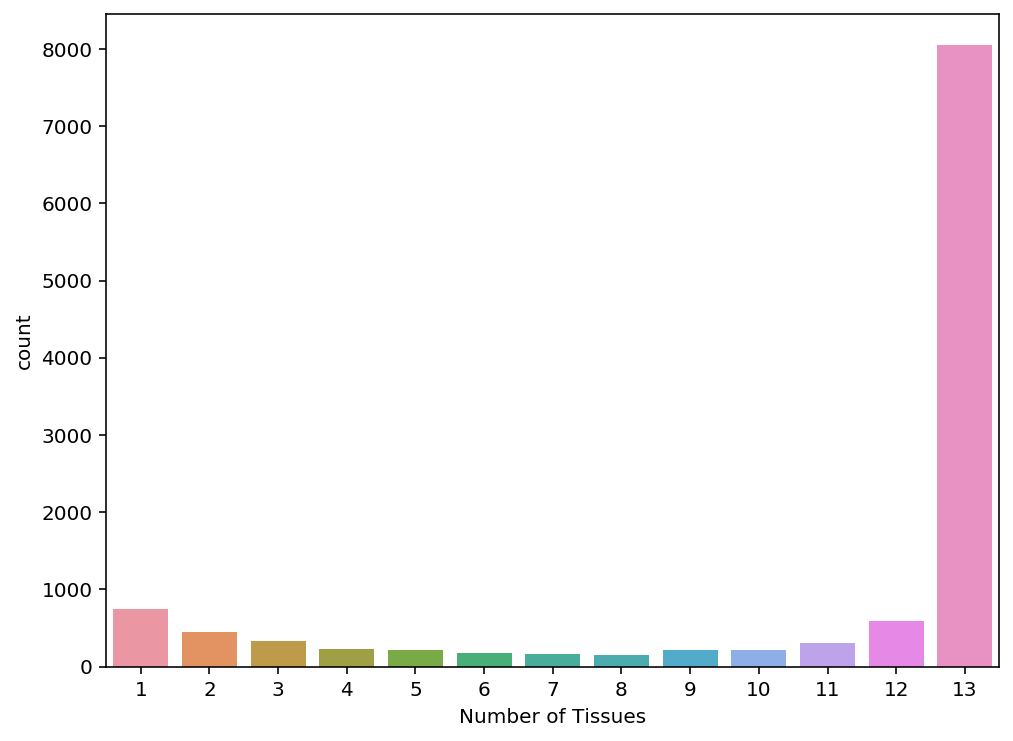

In [39]:
sns.countplot(df_allTissues["Number of Tissues"])

In [45]:
df_allTissues[df_allTissues["Number of Tissues"]==13]

Tissues  \
p1@Cnih1_XM_027386534.1         MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Cgrrf1_XM_027386536.1        MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Gch1_XM_027386540.1          MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Socs4_XM_027386543.1         MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@Mapk1ip1l_XM_027386545.1     MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
...                                                                           ...   
p3@LOC113838223_XM_027434021.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113838541_XM_027434168.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p2@LOC113838541_XM_027434168.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839047_XM_027434508.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   
p1@LOC113839076_XM_027434536.1  MiscOrgans,FemaleReproductive,Lung,Kidney,BMDM...   

                                  cs  CHO ATAC Region      ID          Gene  \
p1@Cnih1_XM_027386534.1         0b11              NaN  298307         Cnih1   
p1@Cgrrf1_XM_027386536.1        0b11              NaN  348288        Cgrrf1   
p1@Gch1_XM_027386540.1          0b11              NaN  243948          Gch1   
p1@Socs4_XM_027386543.1         0b11              NaN  160861         Socs4   
p1@Mapk1ip1l_XM_027386545.1     0b11              NaN  475107     Mapk1ip1l   
...                              ...              ...     ...           ...   
p3@LOC113838223_XM_027434021.1  0b10              NaN  400255  LOC113838223   
p1@LOC113838541_XM_027434168.1  0b11              NaN  145836  LOC113838541   
p2@LOC113838541_XM_027434168.1  0b10              NaN  537728  LOC113838541   
p1@LOC113839047_XM_027434508.1  0b11              NaN  234286  LOC113839047   
p1@LOC113839076_XM_027434536.1  0b11              NaN   23577  LOC113839076   

                                Gene ID      Transcript  Is Experimental  \
p1@Cnih1_XM_027386534.1             NaN  XM_027386534.1              1.0   
p1@Cgrrf1_XM_027386536.1            NaN  XM_027386536.1              1.0   
p1@Gch1_XM_027386540.1              NaN  XM_027386540.1              1.0   
p1@Socs4_XM_027386543.1             NaN  XM_027386543.1              1.0   
p1@Mapk1ip1l_XM_027386545.1         NaN  XM_027386545.1              1.0   
...                                 ...             ...              ...   
p3@LOC113838223_XM_027434021.1      NaN  XM_027434021.1              1.0   
p1@LOC113838541_XM_027434168.1      NaN  XM_027434168.1              1.0   
p2@LOC113838541_XM_027434168.1      NaN  XM_027434168.1              1.0   
p1@LOC113839047_XM_027434508.1      NaN  XM_027434508.1              1.0   
p1@LOC113839076_XM_027434536.1      NaN  XM_027434536.1              1.0   

                                Number of Tissues  
p1@Cnih1_XM_027386534.1                        13  
p1@Cgrrf1_XM_027386536.1                       13  
p1@Gch1_XM_027386540.1                         13  
p1@Socs4_XM_027386543.1                        13  
p1@Mapk1ip1l_XM_027386545.1                    13  
...                                           ...  
p3@LOC113838223_XM_027434021.1                 13  
p1@LOC113838541_XM_027434168.1                 13  
p2@LOC113838541_XM_027434168.1                 13  
p1@LOC113839047_XM_027434508.1                 13  
p1@LOC113839076_XM_027434536.1                 13  

[8048 rows x 9 columns]

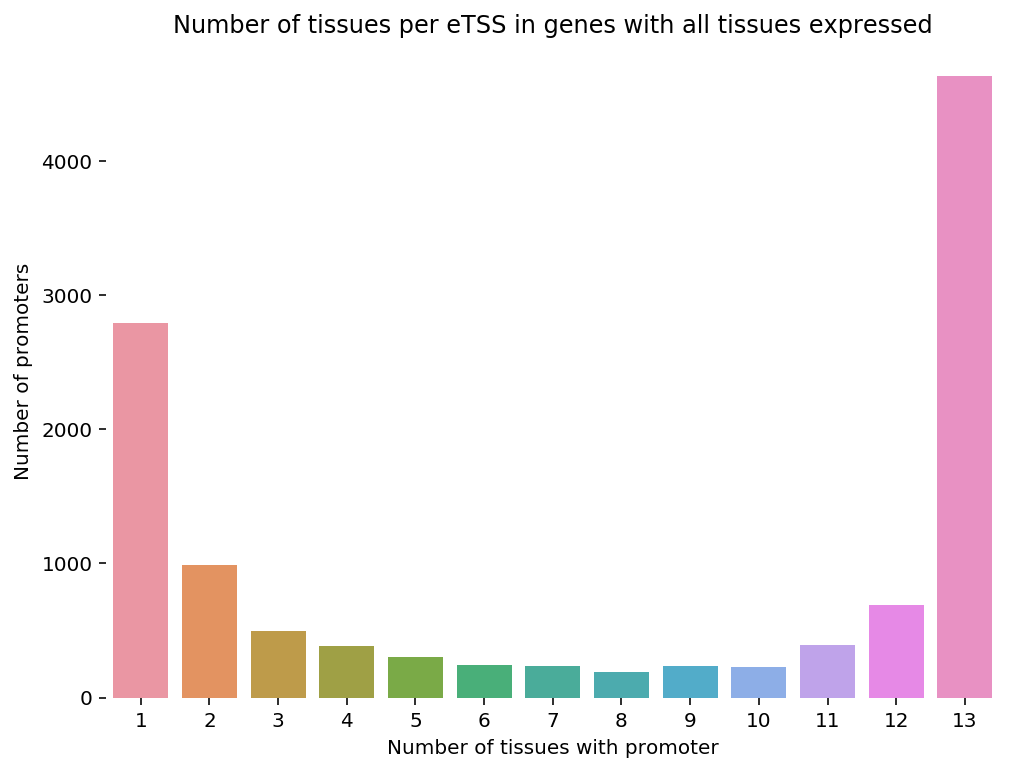

In [65]:
sns.countplot((tissue_expr.loc[df_allTissues["ID"]]>0).sum(axis=1))
plt.title("Number of tissues per eTSS in genes with all tissues expressed")
plt.xlabel("Number of tissues with promoter")
plt.ylabel("Number of promoters")
helper_save(join(save_dir,"tissues_per_eTSS_inGenesWithAllTissues.png"))

In [ ]:
sns.countplot((tissue_expr.loc[df["ID"]]>0).sum(axis=1))
plt.title("Number of tissues per eTSS across all genes")
plt.xlabel("Number of tissues with promoter")
plt.ylabel("Number of promoters")
helper_save(join(save_dir,"tissues_per_eTSS_allGenes.png"))